In [3]:
import pandas as pd
import numpy as np
import requests
import time
import json
import pprint
import csv
from datetime import datetime, timedelta
from pandas_datareader import data,wb
from datetime import date
from dateutil.rrule import rrule, DAILY
import matplotlib.pyplot as plt


In [4]:
csvfile="SP_100_Tickers.csv"
stocks=pd.read_csv(csvfile)
stocks

ticker=list(stocks.Symbol)


In [5]:
url='https://api.iextrading.com/1.0'
sector=[]
name=[]
industry=[]
symbol=[]

In [6]:
for tic in ticker:
    url='https://api.iextrading.com/1.0/stock/'+tic+'/company'
#    query_url=url+tic
    stock_response=requests.get(url)
    stock_json=stock_response.json()
    #json.load(stock_response)
    #print(json.dumps(stock_json,sort_keys=True, indent=4))
    sector.append(stock_json["sector"])
    name.append(stock_json['companyName'])
    industry.append(stock_json['industry'])
    symbol.append(stock_json['symbol'])
stock_df=pd.DataFrame({'sector':sector,'Company':name,'industry':industry, 'ticker':symbol})
    
    
    #if ('sector' in stock_json):
        #sector=stock_json['sector']
        #print(tic
             #)
    #else:
        #print('nada')
    #print(url)
    #print(stock_json)
    

In [7]:
stock_df

Company  \
0                                   Apple Inc.   
1                                  AbbVie Inc.   
2                          Abbott Laboratories   
3              Accenture plc Class A (Ireland)   
4                                 Allergan plc   
5            American International Group Inc.   
6                   Allstate Corporation (The)   
7                                   Amgen Inc.   
8                              Amazon.com Inc.   
9                     American Express Company   
10                          The Boeing Company   
11                 Bank of America Corporation   
12                                 Biogen Inc.   
13   Bank of New York Mellon Corporation (The)   
14                       Booking Holdings Inc.   
15                              BlackRock Inc.   
16                Bristol-Myers Squibb Company   
17                     Berkshire Hathaway Inc.   
18                              Citigroup Inc.   
19                            Caterpillar Inc.   
20                         Celgene Corporation   
21                 Charter Communications Inc.   
22                   Colgate-Palmolive Company   
23    Comcast Corporation Class A Common Stock   
24           Capital One Financial Corporation   
25                              ConocoPhillips   
26                Costco Wholesale Corporation   
27                          Cisco Systems Inc.   
28                      CVS Health Corporation   
29                         Chevron Corporation   
..                                         ...   
72                                Netflix Inc.   
73                                   Nike Inc.   
74                          NVIDIA Corporation   
75                          Oracle Corporation   
76            Occidental Petroleum Corporation   
77                                PepsiCo Inc.   
78                                 Pfizer Inc.   
79              Procter & Gamble Company (The)   
80             Philip Morris International Inc   
81                        PayPal Holdings Inc.   
82                       QUALCOMM Incorporated   
83                            Raytheon Company   
84                       Starbucks Corporation   
85                           Schlumberger N.V.   
86                      Southern Company (The)   
87                   Simon Property Group Inc.   
88                                   AT&T Inc.   
89                          Target Corporation   
90              Texas Instruments Incorporated   
91        UnitedHealth Group Incorporated (DE)   
92                   Union Pacific Corporation   
93                  United Parcel Service Inc.   
94                                U.S. Bancorp   
95             United Technologies Corporation   
96                                   Visa Inc.   
97                 Verizon Communications Inc.   
98               Walgreens Boots Alliance Inc.   
99                       Wells Fargo & Company   
100                               Walmart Inc.   
101                    Exxon Mobil Corporation   

                                industry                  sector ticker  
0                      Computer Hardware              Technology   AAPL  
1                     Drug Manufacturers              Healthcare   ABBV  
2                        Medical Devices              Healthcare    ABT  
3                   Application Software              Technology    ACN  
4                     Drug Manufacturers              Healthcare    AGN  
5                              Insurance      Financial Services    AIG  
6        Insurance - Property & Casualty      Financial Services    ALL  
7                          Biotechnology              Healthcare   AMGN  
8           Retail - Apparel & Specialty       Consumer Cyclical   AMZN  
9                        Credit Services      Financial Services    AXP  
10                   Aerospace & Defense             Industrials     BA  
11                                 Banks      Fina

In [8]:
start=datetime(2018,1,2)
end=datetime.today()

In [10]:
#sector.append(stock_json["sector"])
#name.append(stock_json['companyName'])
#industry.append(stock_json['industry'])



date=[]
high=[]
low=[]
percent_change=[]
stock_open=[]
stock_close=[]
tic_list=[]
volume=[]
x=0

#stock_performance_df=pd.DataFrame()

for tic in ticker:
    
    url2='https://api.iextrading.com/1.0/stock/'+tic+'/chart/ytd'
    stock_performance_response=requests.get(url2)
    stock_performance_json=stock_performance_response.json()
    #print(json.dumps(stock_performance_json,sort_keys=True, indent=4))
    #dates=stock_performance_json.DataReader(start,end)
    
    for day in stock_performance_json:
        print('-------------')
        print(day)
        print('-------------')
        
        
        
        date.append(day["date"])
        high.append(day["high"])
        low.append(day["low"])
        percent_change.append(day["changePercent"])
        stock_open.append(day["open"])
        stock_close.append(day["close"])
        volume.append(day["volume"])
        tic_list.append(tic)
    

-------------
{'date': '2018-01-02', 'open': 168.818, 'high': 170.9412, 'low': 167.9251, 'close': 170.9015, 'volume': 25555934, 'unadjustedVolume': 25555934, 'change': 3.0061, 'changePercent': 1.79, 'vwap': 169.9607, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 171.1694, 'high': 173.1734, 'low': 170.6039, 'close': 170.8717, 'volume': 29517899, 'unadjustedVolume': 29517899, 'change': -0.029763, 'changePercent': -0.017, 'vwap': 171.7488, 'label': 'Jan 3, 18', 'changeOverTime': -0.00017436944672805387}
-------------
-------------
{'date': '2018-01-04', 'open': 171.1793, 'high': 172.1019, 'low': 170.7229, 'close': 171.6654, 'volume': 22434597, 'unadjustedVolume': 22434597, 'change': 0.793691, 'changePercent': 0.464, 'vwap': 171.6073, 'label': 'Jan 4, 18', 'changeOverTime': 0.004469826186429064}
-------------
-------------
{'date': '2018-01-05', 'open': 172.0722, 'high': 173.987, 'low': 171.6853, 'close': 173.6199, 'volume': 23660018,

-------------
{'date': '2018-01-02', 'open': 95.4594, 'high': 97.1889, 'low': 95.0761, 'close': 96.7074, 'volume': 4561295, 'unadjustedVolume': 4561295, 'change': 1.6706, 'changePercent': 1.758, 'vwap': 96.432, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 96.845, 'high': 98.3682, 'low': 96.3438, 'close': 98.2208, 'volume': 4702328, 'unadjustedVolume': 4702328, 'change': 1.5134, 'changePercent': 1.565, 'vwap': 97.7909, 'label': 'Jan 3, 18', 'changeOverTime': 0.015649267791296117}
-------------
-------------
{'date': '2018-01-04', 'open': 98.3387, 'high': 98.3878, 'low': 96.6484, 'close': 97.6606, 'volume': 3578996, 'unadjustedVolume': 3578996, 'change': -0.560138, 'changePercent': -0.57, 'vwap': 97.6367, 'label': 'Jan 4, 18', 'changeOverTime': 0.009856536314697689}
-------------
-------------
{'date': '2018-01-05', 'open': 97.6213, 'high': 99.4491, 'low': 96.8548, 'close': 99.3607, 'volume': 4599309, 'unadjustedVolume': 4599309, '

-------------
{'date': '2018-01-02', 'open': 57.6456, 'high': 58.636, 'low': 57.2662, 'close': 58.23, 'volume': 10113305, 'unadjustedVolume': 10113305, 'change': 1.7036, 'changePercent': 3.014, 'vwap': 58.2007, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 58.428, 'high': 58.4528, 'low': 57.7545, 'close': 58.3587, 'volume': 5684407, 'unadjustedVolume': 5684407, 'change': 0.128762, 'changePercent': 0.221, 'vwap': 58.2462, 'label': 'Jan 3, 18', 'changeOverTime': 0.0022102009273570677}
-------------
-------------
{'date': '2018-01-04', 'open': 58.9332, 'high': 59.0322, 'low': 58.2002, 'close': 58.2597, 'volume': 6239956, 'unadjustedVolume': 6239956, 'change': -0.099047, 'changePercent': -0.17, 'vwap': 58.4235, 'label': 'Jan 4, 18', 'changeOverTime': 0.0005100463678517155}
-------------
-------------
{'date': '2018-01-05', 'open': 58.4776, 'high': 58.5271, 'low': 58.0764, 'close': 58.428, 'volume': 5836945, 'unadjustedVolume': 5836945

-------------
{'date': '2018-01-02', 'open': 152.1573, 'high': 152.7521, 'low': 151.4436, 'close': 152.4944, 'volume': 3061912, 'unadjustedVolume': 3061912, 'change': 0.74344, 'changePercent': 0.49, 'vwap': 152.2226, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 151.6468, 'high': 153.6343, 'low': 151.6468, 'close': 153.1982, 'volume': 2064185, 'unadjustedVolume': 2064185, 'change': 0.703789, 'changePercent': 0.462, 'vwap': 153.1523, 'label': 'Jan 3, 18', 'changeOverTime': 0.004615251445298982}
-------------
-------------
{'date': '2018-01-04', 'open': 153.6442, 'high': 155.4879, 'low': 153.4162, 'close': 155.0121, 'volume': 1777024, 'unadjustedVolume': 1777024, 'change': 1.814, 'changePercent': 1.184, 'vwap': 154.8038, 'label': 'Jan 4, 18', 'changeOverTime': 0.01651011446977719}
-------------
-------------
{'date': '2018-01-05', 'open': 155.2401, 'high': 156.3404, 'low': 154.7643, 'close': 156.2909, 'volume': 1597608, 'unadjustedV

-------------
{'date': '2018-01-02', 'open': 162.5798, 'high': 169.5864, 'low': 161.9951, 'close': 168.7936, 'volume': 3161623, 'unadjustedVolume': 3161623, 'change': 6.6796, 'changePercent': 4.12, 'vwap': 167.1876, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 170.4586, 'high': 170.9243, 'low': 167.3071, 'close': 168.6152, 'volume': 2609163, 'unadjustedVolume': 2609163, 'change': -0.178386, 'changePercent': -0.106, 'vwap': 168.9673, 'label': 'Jan 3, 18', 'changeOverTime': -0.0010569121104118317}
-------------
-------------
{'date': '2018-01-04', 'open': 169.6657, 'high': 170.4387, 'low': 167.3368, 'close': 170.0423, 'volume': 1742685, 'unadjustedVolume': 1742685, 'change': 1.4271, 'changePercent': 0.846, 'vwap': 169.1793, 'label': 'Jan 4, 18', 'changeOverTime': 0.007397792333358692}
-------------
-------------
{'date': '2018-01-05', 'open': 170.8847, 'high': 171.2712, 'low': 169.4675, 'close': 170.746, 'volume': 1749573, 'unadjus

-------------
{'date': '2018-01-02', 'open': 59.3069, 'high': 59.3069, 'low': 58.4371, 'close': 58.8127, 'volume': 3769607, 'unadjustedVolume': 3769607, 'change': -0.079075, 'changePercent': -0.134, 'vwap': 58.8003, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 58.6941, 'high': 59.5837, 'low': 58.5853, 'close': 59.4651, 'volume': 4959322, 'unadjustedVolume': 4959322, 'change': 0.652376, 'changePercent': 1.109, 'vwap': 59.3564, 'label': 'Jan 3, 18', 'changeOverTime': 0.011092842192247595}
-------------
-------------
{'date': '2018-01-04', 'open': 59.7221, 'high': 60.3448, 'low': 59.5837, 'close': 59.7023, 'volume': 4170571, 'unadjustedVolume': 4170571, 'change': 0.237227, 'changePercent': 0.399, 'vwap': 59.8888, 'label': 'Jan 4, 18', 'changeOverTime': 0.01512598469378215}
-------------
-------------
{'date': '2018-01-05', 'open': 59.9395, 'high': 60.0878, 'low': 59.6726, 'close': 59.9494, 'volume': 3726098, 'unadjustedVolume': 3726

-------------
{'date': '2018-01-02', 'open': 103.0445, 'high': 103.4901, 'low': 100.6781, 'close': 100.9157, 'volume': 4788853, 'unadjustedVolume': 4788853, 'change': -2.7625, 'changePercent': -2.665, 'vwap': 101.3842, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 100.9157, 'high': 101.7276, 'low': 100.6484, 'close': 100.9751, 'volume': 1993808, 'unadjustedVolume': 1993808, 'change': 0.059409, 'changePercent': 0.059, 'vwap': 100.9636, 'label': 'Jan 3, 18', 'changeOverTime': 0.0005886100973386358}
-------------
-------------
{'date': '2018-01-04', 'open': 101.2524, 'high': 101.7177, 'low': 99.6978, 'close': 99.8068, 'volume': 2017441, 'unadjustedVolume': 2017441, 'change': -1.1684, 'changePercent': -1.157, 'vwap': 100.2516, 'label': 'Jan 4, 18', 'changeOverTime': -0.01098837940974502}
-------------
-------------
{'date': '2018-01-05', 'open': 100.2424, 'high': 100.9256, 'low': 99.2325, 'close': 100.8662, 'volume': 1587969, 'unadjus

-------------
{'date': '2018-01-02', 'open': 172.7014, 'high': 175.1297, 'low': 171.7855, 'close': 174.3265, 'volume': 2301141, 'unadjustedVolume': 2301141, 'change': 3.0532, 'changePercent': 1.783, 'vwap': 174.1465, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 174.2379, 'high': 178.6999, 'low': 173.1052, 'close': 177.616, 'volume': 3083966, 'unadjustedVolume': 3083966, 'change': 3.2896, 'changePercent': 1.887, 'vwap': 177.0998, 'label': 'Jan 3, 18', 'changeOverTime': 0.018869764493636962}
-------------
-------------
{'date': '2018-01-04', 'open': 177.9017, 'high': 178.1282, 'low': 176.0501, 'close': 176.8675, 'volume': 2021054, 'unadjustedVolume': 2021054, 'change': -0.748521, 'changePercent': -0.421, 'vwap': 176.9864, 'label': 'Jan 4, 18', 'changeOverTime': 0.014576097151035538}
-------------
-------------
{'date': '2018-01-05', 'open': 178.1085, 'high': 178.1479, 'low': 176.3258, 'close': 177.9214, 'volume': 2211382, 'unadjust

-------------
{'date': '2018-01-02', 'open': 1172, 'high': 1190, 'low': 1170.51, 'close': 1189.01, 'volume': 2694494, 'unadjustedVolume': 2694494, 'change': 19.54, 'changePercent': 1.671, 'vwap': 1184.27, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 1188.3, 'high': 1205.49, 'low': 1188.3, 'close': 1204.2, 'volume': 3108793, 'unadjustedVolume': 3108793, 'change': 15.19, 'changePercent': 1.278, 'vwap': 1199.91, 'label': 'Jan 3, 18', 'changeOverTime': 0.012775334101479428}
-------------
-------------
{'date': '2018-01-04', 'open': 1205, 'high': 1215.87, 'low': 1204.66, 'close': 1209.59, 'volume': 3022089, 'unadjustedVolume': 3022089, 'change': 5.39, 'changePercent': 0.448, 'vwap': 1210.12, 'label': 'Jan 4, 18', 'changeOverTime': 0.0173085171697462}
-------------
-------------
{'date': '2018-01-05', 'open': 1217.51, 'high': 1229.14, 'low': 1210, 'close': 1229.14, 'volume': 3544743, 'unadjustedVolume': 3544743, 'change': 19.55, 'chang

-------------
{'date': '2018-01-02', 'open': 99.0077, 'high': 99.0077, 'low': 97.5086, 'close': 98.2234, 'volume': 2746672, 'unadjustedVolume': 2746672, 'change': -0.367321, 'changePercent': -0.373, 'vwap': 98.1307, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 98.5212, 'high': 99.0375, 'low': 98.3028, 'close': 98.829, 'volume': 2976441, 'unadjustedVolume': 2976441, 'change': 0.605582, 'changePercent': 0.617, 'vwap': 98.6282, 'label': 'Jan 3, 18', 'changeOverTime': 0.006165536929082026}
-------------
-------------
{'date': '2018-01-04', 'open': 99.6559, 'high': 101.2698, 'low': 99.5363, 'close': 100.4728, 'volume': 3122034, 'unadjustedVolume': 3122034, 'change': 1.6438, 'changePercent': 1.663, 'vwap': 100.6194, 'label': 'Jan 4, 18', 'changeOverTime': 0.022900856618687692}
-------------
-------------
{'date': '2018-01-05', 'open': 100.4728, 'high': 100.702, 'low': 99.895, 'close': 100.702, 'volume': 2550286, 'unadjustedVolume': 255

-------------
{'date': '2018-01-02', 'open': 292.8364, 'high': 294.0642, 'low': 292.4859, 'close': 293.9156, 'volume': 2978918, 'unadjustedVolume': 2978918, 'change': 1.911, 'changePercent': 0.654, 'vwap': 293.2304, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 293.0245, 'high': 295.5593, 'low': 292.5591, 'close': 294.8662, 'volume': 3211195, 'unadjustedVolume': 3211195, 'change': 0.950542, 'changePercent': 0.323, 'vwap': 293.8544, 'label': 'Jan 3, 18', 'changeOverTime': 0.003234261808491991}
-------------
-------------
{'date': '2018-01-04', 'open': 295.0048, 'high': 295.4801, 'low': 292.5591, 'close': 293.7473, 'volume': 4171720, 'unadjustedVolume': 4171720, 'change': -1.1189, 'changePercent': -0.379, 'vwap': 293.7394, 'label': 'Jan 4, 18', 'changeOverTime': -0.0005726133624754451}
-------------
-------------
{'date': '2018-01-05', 'open': 293.8463, 'high': 305.8469, 'low': 293.7968, 'close': 305.7974, 'volume': 6177731, 'unadju

-------------
{'date': '2018-01-02', 'open': 29.5182, 'high': 29.667, 'low': 29.3793, 'close': 29.667, 'volume': 57121603, 'unadjustedVolume': 57121603, 'change': 0.37704, 'changePercent': 1.287, 'vwap': 29.5059, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 29.667, 'high': 29.7067, 'low': 29.4587, 'close': 29.5678, 'volume': 57865727, 'unadjustedVolume': 57865727, 'change': -0.099221, 'changePercent': -0.334, 'vwap': 29.5507, 'label': 'Jan 3, 18', 'changeOverTime': -0.0033437826541275924}
-------------
-------------
{'date': '2018-01-04', 'open': 29.7365, 'high': 30.2028, 'low': 29.6472, 'close': 29.9548, 'volume': 76512451, 'unadjustedVolume': 76512451, 'change': 0.386961, 'changePercent': 1.309, 'vwap': 29.9835, 'label': 'Jan 4, 18', 'changeOverTime': 0.009701014595341529}
-------------
-------------
{'date': '2018-01-05', 'open': 30.1334, 'high': 30.183, 'low': 29.8159, 'close': 30.0937, 'volume': 56445186, 'unadjustedVolume':

-------------
{'date': '2018-01-02', 'open': 321.15, 'high': 335.43, 'low': 318.33, 'close': 334.17, 'volume': 1422514, 'unadjustedVolume': 1422514, 'change': 15.6, 'changePercent': 4.897, 'vwap': 330.797, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 333.46, 'high': 340.45, 'low': 332.71, 'close': 339.85, 'volume': 1121700, 'unadjustedVolume': 1121700, 'change': 5.68, 'changePercent': 1.7, 'vwap': 338.1876, 'label': 'Jan 3, 18', 'changeOverTime': 0.01699733668492087}
-------------
-------------
{'date': '2018-01-04', 'open': 339.73, 'high': 341.4, 'low': 335.46, 'close': 339.99, 'volume': 967081, 'unadjustedVolume': 967081, 'change': 0.14, 'changePercent': 0.041, 'vwap': 339.0957, 'label': 'Jan 4, 18', 'changeOverTime': 0.01741628512433789}
-------------
-------------
{'date': '2018-01-05', 'open': 342, 'high': 344.12, 'low': 339.06, 'close': 342.49, 'volume': 1486430, 'unadjustedVolume': 1486430, 'change': 2.5, 'changePercent': 

-------------
{'date': '2018-01-02', 'open': 53.8101, 'high': 53.939, 'low': 53.2251, 'close': 53.3639, 'volume': 3633056, 'unadjustedVolume': 3633056, 'change': -0.039661, 'changePercent': -0.074, 'vwap': 53.4464, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 53.4631, 'high': 53.7903, 'low': 53.2053, 'close': 53.6911, 'volume': 2409301, 'unadjustedVolume': 2409301, 'change': 0.327203, 'changePercent': 0.613, 'vwap': 53.5966, 'label': 'Jan 3, 18', 'changeOverTime': 0.006131485892148019}
-------------
-------------
{'date': '2018-01-04', 'open': 53.9093, 'high': 54.5835, 'low': 53.8002, 'close': 54.2266, 'volume': 2886534, 'unadjustedVolume': 2886534, 'change': 0.535424, 'changePercent': 0.997, 'vwap': 54.3305, 'label': 'Jan 4, 18', 'changeOverTime': 0.016166359655122597}
-------------
-------------
{'date': '2018-01-05', 'open': 54.3852, 'high': 54.4546, 'low': 53.9688, 'close': 54.3654, 'volume': 2514720, 'unadjustedVolume': 2514

-------------
{'date': '2018-01-02', 'open': 1750.09, 'high': 1790.66, 'low': 1744.5, 'close': 1784.75, 'volume': 475542, 'unadjustedVolume': 475542, 'change': 47.01, 'changePercent': 2.705, 'vwap': 1777.63, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 1790.23, 'high': 1829.02, 'low': 1785, 'close': 1824.16, 'volume': 525606, 'unadjustedVolume': 525606, 'change': 39.41, 'changePercent': 2.208, 'vwap': 1820.92, 'label': 'Jan 3, 18', 'changeOverTime': 0.022081524022972452}
-------------
-------------
{'date': '2018-01-04', 'open': 1838.54, 'high': 1848.9, 'low': 1802.03, 'close': 1807.25, 'volume': 592572, 'unadjustedVolume': 592572, 'change': -16.91, 'changePercent': -0.927, 'vwap': 1819.42, 'label': 'Jan 4, 18', 'changeOverTime': 0.012606807676145118}
-------------
-------------
{'date': '2018-01-05', 'open': 1820.18, 'high': 1825.5, 'low': 1805.8, 'close': 1823.54, 'volume': 358593, 'unadjustedVolume': 358593, 'change': 16.29, '

-------------
{'date': '2018-01-02', 'open': 513.2589, 'high': 513.2589, 'low': 501.0899, 'close': 503.5533, 'volume': 527135, 'unadjustedVolume': 527135, 'change': -4.6896, 'changePercent': -0.923, 'vwap': 504.6634, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 503.2466, 'high': 509.2619, 'low': 502.7519, 'close': 508.8661, 'volume': 448724, 'unadjustedVolume': 448724, 'change': 5.3128, 'changePercent': 1.055, 'vwap': 507.0088, 'label': 'Jan 3, 18', 'changeOverTime': 0.010550620957106306}
-------------
-------------
{'date': '2018-01-04', 'open': 511.0031, 'high': 515.7619, 'low': 509.529, 'close': 515.5839, 'volume': 389830, 'unadjustedVolume': 389830, 'change': 6.7177, 'changePercent': 1.32, 'vwap': 514.4745, 'label': 'Jan 4, 18', 'changeOverTime': 0.023891413282367515}
-------------
-------------
{'date': '2018-01-05', 'open': 518.2848, 'high': 520.3427, 'low': 515.3464, 'close': 519.9766, 'volume': 482968, 'unadjustedVolume':

-------------
{'date': '2018-01-02', 'open': 60.6123, 'high': 60.7209, 'low': 60.0595, 'close': 60.5235, 'volume': 6472651, 'unadjustedVolume': 6472651, 'change': 0.029615, 'changePercent': 0.049, 'vwap': 60.3812, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 60.4248, 'high': 60.716, 'low': 59.9213, 'close': 60.5728, 'volume': 7433967, 'unadjustedVolume': 7433967, 'change': 0.049358, 'changePercent': 0.082, 'vwap': 60.4315, 'label': 'Jan 3, 18', 'changeOverTime': 0.0008145596338612662}
-------------
-------------
{'date': '2018-01-04', 'open': 60.6126, 'high': 61.4274, 'low': 60.394, 'close': 61.3578, 'volume': 6403211, 'unadjustedVolume': 6403211, 'change': 0.784989, 'changePercent': 1.296, 'vwap': 61.1101, 'label': 'Jan 4, 18', 'changeOverTime': 0.013784728246053169}
-------------
-------------
{'date': '2018-01-05', 'open': 61.4771, 'high': 61.7801, 'low': 61.0895, 'close': 61.4969, 'volume': 6113360, 'unadjustedVolume': 611336

-------------
{'date': '2018-01-02', 'open': 198.87, 'high': 198.87, 'low': 195.96, 'close': 197.22, 'volume': 4112983, 'unadjustedVolume': 4112983, 'change': -1, 'changePercent': -0.504, 'vwap': 197.219, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 197, 'high': 200, 'low': 197, 'close': 199.79, 'volume': 3526694, 'unadjustedVolume': 3526694, 'change': 2.57, 'changePercent': 1.303, 'vwap': 199.0311, 'label': 'Jan 3, 18', 'changeOverTime': 0.013031132745157657}
-------------
-------------
{'date': '2018-01-04', 'open': 200.9, 'high': 202.1299, 'low': 200.01, 'close': 200.69, 'volume': 3899998, 'unadjustedVolume': 3899998, 'change': 0.9, 'changePercent': 0.45, 'vwap': 201.2048, 'label': 'Jan 4, 18', 'changeOverTime': 0.017594564445796566}
-------------
-------------
{'date': '2018-01-05', 'open': 201, 'high': 201.67, 'low': 199.31, 'close': 201.42, 'volume': 4207636, 'unadjustedVolume': 4207636, 'change': 0.73, 'changePercent': 0.3

-------------
{'date': '2018-01-02', 'open': 74.4344, 'high': 74.5236, 'low': 73.3688, 'close': 73.7108, 'volume': 15819844, 'unadjustedVolume': 15819844, 'change': -0.049564, 'changePercent': -0.067, 'vwap': 73.7229, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 73.7009, 'high': 74.0831, 'low': 73.3242, 'close': 73.9388, 'volume': 14657944, 'unadjustedVolume': 14657944, 'change': 0.227991, 'changePercent': 0.309, 'vwap': 73.801, 'label': 'Jan 3, 18', 'changeOverTime': 0.0030931695219695676}
-------------
-------------
{'date': '2018-01-04', 'open': 74.3551, 'high': 75.4504, 'low': 74.0081, 'close': 74.8507, 'volume': 16864920, 'unadjustedVolume': 16864920, 'change': 0.911969, 'changePercent': 1.233, 'vwap': 74.9731, 'label': 'Jan 4, 18', 'changeOverTime': 0.01546449095654907}
-------------
-------------
{'date': '2018-01-05', 'open': 75.049, 'high': 75.1085, 'low': 74.3055, 'close': 74.7516, 'volume': 15300543, 'unadjustedVolume'

-------------
{'date': '2018-01-02', 'open': 156.7792, 'high': 157.8588, 'low': 154.531, 'close': 155.5313, 'volume': 5108362, 'unadjustedVolume': 5108362, 'change': -0.534813, 'changePercent': -0.343, 'vwap': 155.635, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 155.5313, 'high': 155.977, 'low': 153.9071, 'close': 155.769, 'volume': 4146054, 'unadjustedVolume': 4146054, 'change': 0.237695, 'changePercent': 0.153, 'vwap': 155.2104, 'label': 'Jan 3, 18', 'changeOverTime': 0.0015283097357253364}
-------------
-------------
{'date': '2018-01-04', 'open': 156.3732, 'high': 158.0469, 'low': 155.5115, 'close': 157.9083, 'volume': 4865769, 'unadjustedVolume': 4865769, 'change': 2.1392, 'changePercent': 1.373, 'vwap': 157.1093, 'label': 'Jan 4, 18', 'changeOverTime': 0.015283097357252268}
-------------
-------------
{'date': '2018-01-05', 'open': 158.7204, 'high': 160.4932, 'low': 158.1064, 'close': 160.4041, 'volume': 3945401, 'unadjust

-------------
{'date': '2018-01-02', 'open': 105.29, 'high': 106.7, 'low': 104.58, 'close': 106.16, 'volume': 4742039, 'unadjustedVolume': 4742039, 'change': 1.8, 'changePercent': 1.725, 'vwap': 105.9683, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 106.22, 'high': 109.89, 'low': 105.82, 'close': 109.14, 'volume': 5451800, 'unadjustedVolume': 5451800, 'change': 2.98, 'changePercent': 2.807, 'vwap': 108.6224, 'label': 'Jan 3, 18', 'changeOverTime': 0.028070836473247967}
-------------
-------------
{'date': '2018-01-04', 'open': 109.95, 'high': 109.98, 'low': 106.565, 'close': 106.68, 'volume': 5929880, 'unadjustedVolume': 5929880, 'change': -2.46, 'changePercent': -2.254, 'vwap': 107.2204, 'label': 'Jan 4, 18', 'changeOverTime': 0.00489826676714403}
-------------
-------------
{'date': '2018-01-05', 'open': 106.01, 'high': 106.68, 'low': 104.05, 'close': 104.99, 'volume': 10586730, 'unadjustedVolume': 10586730, 'change': -1.69, 'c

-------------
{'date': '2018-01-02', 'open': 338.43, 'high': 352.82, 'low': 337.77, 'close': 348.97, 'volume': 2789254, 'unadjustedVolume': 2789254, 'change': 13.01, 'changePercent': 3.872, 'vwap': 347.8502, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 354.06, 'high': 364.38, 'low': 349.59, 'close': 353.03, 'volume': 2500770, 'unadjustedVolume': 2500770, 'change': 4.06, 'changePercent': 1.163, 'vwap': 353.3145, 'label': 'Jan 3, 18', 'changeOverTime': 0.011634237900105869}
-------------
-------------
{'date': '2018-01-04', 'open': 356.75, 'high': 358, 'low': 346.97, 'close': 349.79, 'volume': 1176448, 'unadjustedVolume': 1176448, 'change': -3.24, 'changePercent': -0.918, 'vwap': 350.0434, 'label': 'Jan 4, 18', 'changeOverTime': 0.0023497721867209017}
-------------
-------------
{'date': '2018-01-05', 'open': 352.02, 'high': 354.4, 'low': 349.08, 'close': 350.88, 'volume': 1960497, 'unadjustedVolume': 1960497, 'change': 1.09, 'chan

-------------
{'date': '2018-01-02', 'open': 74.6034, 'high': 75.1672, 'low': 74.0199, 'close': 74.3166, 'volume': 4352470, 'unadjustedVolume': 4352470, 'change': -0.306604, 'changePercent': -0.411, 'vwap': 74.457, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 74.287, 'high': 74.8903, 'low': 73.8369, 'close': 74.0298, 'volume': 3310214, 'unadjustedVolume': 3310214, 'change': -0.286822, 'changePercent': -0.386, 'vwap': 74.119, 'label': 'Jan 3, 18', 'changeOverTime': -0.0038591647088268236}
-------------
-------------
{'date': '2018-01-04', 'open': 74.2276, 'high': 75.1277, 'low': 74.1584, 'close': 74.5045, 'volume': 2501692, 'unadjustedVolume': 2501692, 'change': 0.47474, 'changePercent': 0.641, 'vwap': 74.694, 'label': 'Jan 4, 18', 'changeOverTime': 0.0025283718577006897}
-------------
-------------
{'date': '2018-01-05', 'open': 74.6727, 'high': 74.7567, 'low': 74.3166, 'close': 74.5936, 'volume': 2852827, 'unadjustedVolume': 285

-------------
{'date': '2018-01-02', 'open': 39.9285, 'high': 40.6403, 'low': 39.5924, 'close': 40.6007, 'volume': 18270282, 'unadjustedVolume': 18270282, 'change': 1.1641, 'changePercent': 2.952, 'vwap': 40.428, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 40.2844, 'high': 40.8973, 'low': 39.5924, 'close': 39.9483, 'volume': 21062861, 'unadjustedVolume': 21062861, 'change': -0.652459, 'changePercent': -1.607, 'vwap': 40.0234, 'label': 'Jan 3, 18', 'changeOverTime': -0.016068688470888434}
-------------
-------------
{'date': '2018-01-04', 'open': 40.0076, 'high': 40.2547, 'low': 39.6418, 'close': 40.2053, 'volume': 18143793, 'unadjustedVolume': 18143793, 'change': 0.257029, 'changePercent': 0.643, 'vwap': 40.039, 'label': 'Jan 4, 18', 'changeOverTime': -0.009738748346703435}
-------------
-------------
{'date': '2018-01-05', 'open': 40.4426, 'high': 40.7688, 'low': 39.9483, 'close': 40.5711, 'volume': 17007527, 'unadjustedVolume'

-------------
{'date': '2018-01-02', 'open': 99.2139, 'high': 99.3328, 'low': 97.9053, 'close': 98.748, 'volume': 1663682, 'unadjustedVolume': 1663682, 'change': 0.02974, 'changePercent': 0.03, 'vwap': 98.4391, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 98.6389, 'high': 98.9165, 'low': 97.8954, 'close': 98.5794, 'volume': 2323687, 'unadjustedVolume': 2323687, 'change': -0.168528, 'changePercent': -0.171, 'vwap': 98.4256, 'label': 'Jan 3, 18', 'changeOverTime': -0.0017073763519260933}
-------------
-------------
{'date': '2018-01-04', 'open': 99.4915, 'high': 101.2769, 'low': 98.8273, 'close': 100.5423, 'volume': 2149105, 'unadjustedVolume': 2149105, 'change': 1.9629, 'changePercent': 1.991, 'vwap': 100.6, 'label': 'Jan 4, 18', 'changeOverTime': 0.018170494592295465}
-------------
-------------
{'date': '2018-01-05', 'open': 100.7009, 'high': 100.8199, 'low': 99.8682, 'close': 100.5522, 'volume': 2058451, 'unadjustedVolume': 205

-------------
{'date': '2018-01-02', 'open': 54.5699, 'high': 54.9859, 'low': 54.3024, 'close': 54.7977, 'volume': 3985183, 'unadjustedVolume': 3985183, 'change': 0.42594, 'changePercent': 0.783, 'vwap': 54.7158, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 54.8572, 'high': 55.8576, 'low': 54.8076, 'close': 55.8081, 'volume': 4105840, 'unadjustedVolume': 4105840, 'change': 1.0104, 'changePercent': 1.844, 'vwap': 55.5724, 'label': 'Jan 3, 18', 'changeOverTime': 0.01843873009268645}
-------------
-------------
{'date': '2018-01-04', 'open': 55.8774, 'high': 56.6454, 'low': 55.5605, 'close': 56.452, 'volume': 4897240, 'unadjustedVolume': 4897240, 'change': 0.643864, 'changePercent': 1.154, 'vwap': 56.3279, 'label': 'Jan 4, 18', 'changeOverTime': 0.030189223270319726}
-------------
-------------
{'date': '2018-01-05', 'open': 56.1449, 'high': 56.3727, 'low': 55.6496, 'close': 56.343, 'volume': 3771851, 'unadjustedVolume': 3771851, 'c

-------------
{'date': '2018-01-02', 'open': 186.1873, 'high': 189.6181, 'low': 185.7, 'close': 187.2712, 'volume': 2509344, 'unadjustedVolume': 2509344, 'change': 2.1877, 'changePercent': 1.182, 'vwap': 187.7793, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 187.7684, 'high': 191.0301, 'low': 187.3309, 'close': 189.5186, 'volume': 3364378, 'unadjustedVolume': 3364378, 'change': 2.2474, 'changePercent': 1.2, 'vwap': 189.6823, 'label': 'Jan 3, 18', 'changeOverTime': 0.012000777482068781}
-------------
-------------
{'date': '2018-01-04', 'open': 190.9307, 'high': 191.229, 'low': 186.5164, 'close': 188.0469, 'volume': 3525786, 'unadjustedVolume': 3525786, 'change': -1.4718, 'changePercent': -0.777, 'vwap': 188.0691, 'label': 'Jan 4, 18', 'changeOverTime': 0.0041421211590463485}
-------------
-------------
{'date': '2018-01-05', 'open': 188.375, 'high': 188.6236, 'low': 185.6801, 'close': 186.7044, 'volume': 2819026, 'unadjustedVolum

-------------
{'date': '2018-01-02', 'open': 38.0776, 'high': 38.3533, 'low': 37.8413, 'close': 38.2647, 'volume': 20135657, 'unadjustedVolume': 20135657, 'change': 0.551421, 'changePercent': 1.462, 'vwap': 38.144, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 38.1268, 'high': 38.6832, 'low': 37.9397, 'close': 38.5699, 'volume': 29536019, 'unadjustedVolume': 29536019, 'change': 0.30525, 'changePercent': 0.798, 'vwap': 38.3782, 'label': 'Jan 3, 18', 'changeOverTime': 0.007976019673484942}
-------------
-------------
{'date': '2018-01-04', 'open': 38.7386, 'high': 39.2247, 'low': 38.6195, 'close': 38.6791, 'volume': 20731358, 'unadjustedVolume': 20731358, 'change': 0.109138, 'changePercent': 0.283, 'vwap': 38.8319, 'label': 'Jan 4, 18', 'changeOverTime': 0.010829824877759412}
-------------
-------------
{'date': '2018-01-05', 'open': 39.2346, 'high': 39.562, 'low': 39.0511, 'close': 39.2147, 'volume': 24588152, 'unadjustedVolume': 2

-------------
{'date': '2018-01-02', 'open': 72.0575, 'high': 73.0142, 'low': 71.8701, 'close': 72.5112, 'volume': 5878294, 'unadjustedVolume': 5878294, 'change': 1.006, 'changePercent': 1.407, 'vwap': 72.5111, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 72.7183, 'high': 72.8859, 'low': 72.0575, 'close': 72.1955, 'volume': 6139515, 'unadjustedVolume': 6139515, 'change': -0.315609, 'changePercent': -0.435, 'vwap': 72.332, 'label': 'Jan 3, 18', 'changeOverTime': -0.004353810170015208}
-------------
-------------
{'date': '2018-01-04', 'open': 74.1582, 'high': 75.6179, 'low': 73.6552, 'close': 74.0991, 'volume': 13715528, 'unadjustedVolume': 13715528, 'change': 1.9035, 'changePercent': 2.637, 'vwap': 74.5938, 'label': 'Jan 4, 18', 'changeOverTime': 0.02189868599609446}
-------------
-------------
{'date': '2018-01-05', 'open': 75.2629, 'high': 77.4806, 'low': 75.0952, 'close': 77.3735, 'volume': 15338063, 'unadjustedVolume': 153380

-------------
{'date': '2018-01-02', 'open': 123.3948, 'high': 125.3874, 'low': 123.228, 'close': 125.2304, 'volume': 5626785, 'unadjustedVolume': 5626785, 'change': 2.346, 'changePercent': 1.909, 'vwap': 124.5317, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 125.1126, 'high': 126.5653, 'low': 124.5629, 'close': 126.1433, 'volume': 5805458, 'unadjustedVolume': 5805458, 'change': 0.912873, 'changePercent': 0.729, 'vwap': 125.8643, 'label': 'Jan 3, 18', 'changeOverTime': 0.007289763507902182}
-------------
-------------
{'date': '2018-01-04', 'open': 125.5936, 'high': 125.9862, 'low': 124.877, 'close': 125.7506, 'volume': 4598264, 'unadjustedVolume': 4598264, 'change': -0.392633, 'changePercent': -0.311, 'vwap': 125.4552, 'label': 'Jan 4, 18', 'changeOverTime': 0.004153943451430345}
-------------
-------------
{'date': '2018-01-05', 'open': 125.6132, 'high': 125.7408, 'low': 124.7592, 'close': 125.5445, 'volume': 4189223, 'unadjust

-------------
{'date': '2018-01-02', 'open': 92.8751, 'high': 93.1841, 'low': 91.8784, 'close': 92.1375, 'volume': 3623822, 'unadjustedVolume': 3623822, 'change': -0.378756, 'changePercent': -0.409, 'vwap': 92.4417, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 91.9382, 'high': 93.6027, 'low': 91.9132, 'close': 93.3635, 'volume': 2474514, 'unadjustedVolume': 2474514, 'change': 1.226, 'changePercent': 1.331, 'vwap': 93.0183, 'label': 'Jan 3, 18', 'changeOverTime': 0.013306199972866629}
-------------
-------------
{'date': '2018-01-04', 'open': 93.812, 'high': 94.5994, 'low': 93.7123, 'close': 93.812, 'volume': 2125204, 'unadjustedVolume': 2125204, 'change': 0.448528, 'changePercent': 0.48, 'vwap': 94.1143, 'label': 'Jan 4, 18', 'changeOverTime': 0.01817392484059145}
-------------
-------------
{'date': '2018-01-05', 'open': 94.2007, 'high': 94.6792, 'low': 94.0313, 'close': 94.4001, 'volume': 1880693, 'unadjustedVolume': 1880693, '

-------------
{'date': '2018-01-02', 'open': 108.95, 'high': 111.81, 'low': 108.56, 'close': 111.8, 'volume': 11014303, 'unadjustedVolume': 11014303, 'change': 4.29, 'changePercent': 3.99, 'vwap': 110.6706, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 112.19, 'high': 113.19, 'low': 111.45, 'close': 112.28, 'volume': 9237926, 'unadjustedVolume': 9237926, 'change': 0.48, 'changePercent': 0.429, 'vwap': 112.3138, 'label': 'Jan 3, 18', 'changeOverTime': 0.00429338103756712}
-------------
-------------
{'date': '2018-01-04', 'open': 112.95, 'high': 113, 'low': 111.63, 'close': 112.23, 'volume': 7417409, 'unadjustedVolume': 7417409, 'change': -0.05, 'changePercent': -0.045, 'vwap': 112.0398, 'label': 'Jan 4, 18', 'changeOverTime': 0.003846153846153907}
-------------
-------------
{'date': '2018-01-05', 'open': 112.68, 'high': 112.68, 'low': 111.24, 'close': 111.62, 'volume': 6008285, 'unadjustedVolume': 6008285, 'change': -0.61, 'chang

-------------
{'date': '2018-01-02', 'open': 82.3113, 'high': 82.448, 'low': 80.9635, 'close': 81.2858, 'volume': 3167926, 'unadjustedVolume': 3167926, 'change': -0.859445, 'changePercent': -1.046, 'vwap': 81.2898, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 81.1198, 'high': 81.8328, 'low': 80.9049, 'close': 81.0319, 'volume': 2690205, 'unadjustedVolume': 2690205, 'change': -0.253926, 'changePercent': -0.312, 'vwap': 81.228, 'label': 'Jan 3, 18', 'changeOverTime': -0.0031235467941510275}
-------------
-------------
{'date': '2018-01-04', 'open': 80.8854, 'high': 81.2858, 'low': 80.2311, 'close': 80.3971, 'volume': 2475760, 'unadjustedVolume': 2475760, 'change': -0.634817, 'changePercent': -0.783, 'vwap': 80.7527, 'label': 'Jan 4, 18', 'changeOverTime': -0.010933028893115404}
-------------
-------------
{'date': '2018-01-05', 'open': 80.5827, 'high': 80.817, 'low': 79.4497, 'close': 80.026, 'volume': 3827159, 'unadjustedVolume': 

-------------
{'date': '2018-01-02', 'open': 70.7796, 'high': 71.3928, 'low': 70.6115, 'close': 71.106, 'volume': 7430608, 'unadjustedVolume': 7430608, 'change': 0.672491, 'changePercent': 0.955, 'vwap': 70.9246, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 71.2148, 'high': 72.3323, 'low': 70.8983, 'close': 72.2433, 'volume': 7885764, 'unadjustedVolume': 7885764, 'change': 1.1373, 'changePercent': 1.599, 'vwap': 71.9805, 'label': 'Jan 3, 18', 'changeOverTime': 0.01599443084971747}
-------------
-------------
{'date': '2018-01-04', 'open': 72.3619, 'high': 73.9097, 'low': 72.3323, 'close': 73.6278, 'volume': 9716612, 'unadjustedVolume': 9716612, 'change': 1.3845, 'changePercent': 1.916, 'vwap': 73.5481, 'label': 'Jan 4, 18', 'changeOverTime': 0.035465361572863036}
-------------
-------------
{'date': '2018-01-05', 'open': 73.6773, 'high': 74.7058, 'low': 73.6674, 'close': 74.5871, 'volume': 9140192, 'unadjustedVolume': 9140192, 'c

-------------
{'date': '2018-01-02', 'open': 69.1143, 'high': 69.8049, 'low': 68.7592, 'close': 69.7851, 'volume': 3086515, 'unadjustedVolume': 3086515, 'change': 1.0358, 'changePercent': 1.507, 'vwap': 69.4617, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 69.7654, 'high': 70.4954, 'low': 69.2722, 'close': 70.4264, 'volume': 3308783, 'unadjustedVolume': 3308783, 'change': 0.641227, 'changePercent': 0.919, 'vwap': 70.0303, 'label': 'Jan 3, 18', 'changeOverTime': 0.009189640768588152}
-------------
-------------
{'date': '2018-01-04', 'open': 70.5349, 'high': 70.8407, 'low': 70.2468, 'close': 70.525, 'volume': 2806379, 'unadjustedVolume': 2806379, 'change': 0.09865, 'changePercent': 0.14, 'vwap': 70.4558, 'label': 'Jan 4, 18', 'changeOverTime': 0.010602549827971956}
-------------
-------------
{'date': '2018-01-05', 'open': 70.7914, 'high': 71.4967, 'low': 70.2389, 'close': 71.4523, 'volume': 3118806, 'unadjustedVolume': 3118806, '

-------------
{'date': '2018-01-02', 'open': 38.8389, 'high': 38.9862, 'low': 38.5638, 'close': 38.888, 'volume': 5153123, 'unadjustedVolume': 5153123, 'change': 0.176808, 'changePercent': 0.457, 'vwap': 38.8237, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 38.6719, 'high': 39.1729, 'low': 38.0825, 'close': 38.3674, 'volume': 4814780, 'unadjustedVolume': 4814780, 'change': -0.520601, 'changePercent': -1.339, 'vwap': 38.456, 'label': 'Jan 3, 18', 'changeOverTime': -0.013387163135157237}
-------------
-------------
{'date': '2018-01-04', 'open': 38.279, 'high': 38.446, 'low': 37.8075, 'close': 37.8271, 'volume': 4729444, 'unadjustedVolume': 4729444, 'change': -0.540248, 'changePercent': -1.408, 'vwap': 38.059, 'label': 'Jan 4, 18', 'changeOverTime': -0.027280909277926268}
-------------
-------------
{'date': '2018-01-05', 'open': 38.0334, 'high': 38.1415, 'low': 37.39, 'close': 37.5128, 'volume': 7142138, 'unadjustedVolume': 714213

-------------
{'date': '2018-01-02', 'open': 12.0591, 'high': 12.1939, 'low': 12.0398, 'close': 12.1939, 'volume': 20773320, 'unadjustedVolume': 20773320, 'change': 0.163743, 'changePercent': 1.361, 'vwap': 12.1487, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 12.2132, 'high': 12.3288, 'low': 12.2036, 'close': 12.2903, 'volume': 29765638, 'unadjustedVolume': 29765638, 'change': 0.096318, 'changePercent': 0.79, 'vwap': 12.2764, 'label': 'Jan 3, 18', 'changeOverTime': 0.007905592140332538}
-------------
-------------
{'date': '2018-01-04', 'open': 12.3095, 'high': 12.5599, 'low': 12.2999, 'close': 12.5022, 'volume': 37478200, 'unadjustedVolume': 37478200, 'change': 0.211901, 'changePercent': 1.724, 'vwap': 12.5034, 'label': 'Jan 4, 18', 'changeOverTime': 0.025283133369963746}
-------------
-------------
{'date': '2018-01-05', 'open': 12.5792, 'high': 12.7333, 'low': 12.5599, 'close': 12.7141, 'volume': 46121873, 'unadjustedVolume':

-------------
{'date': '2018-01-02', 'open': 177.68, 'high': 181.58, 'low': 177.55, 'close': 181.42, 'volume': 18151903, 'unadjustedVolume': 18151903, 'change': 4.96, 'changePercent': 2.811, 'vwap': 180.0831, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 181.88, 'high': 184.78, 'low': 181.33, 'close': 184.67, 'volume': 16886563, 'unadjustedVolume': 16886563, 'change': 3.25, 'changePercent': 1.791, 'vwap': 183.5547, 'label': 'Jan 3, 18', 'changeOverTime': 0.017914232168448903}
-------------
-------------
{'date': '2018-01-04', 'open': 184.9, 'high': 186.21, 'low': 184.0996, 'close': 184.33, 'volume': 13880896, 'unadjustedVolume': 13880896, 'change': -0.34, 'changePercent': -0.184, 'vwap': 184.9853, 'label': 'Jan 4, 18', 'changeOverTime': 0.016040127880057466}
-------------
-------------
{'date': '2018-01-05', 'open': 185.59, 'high': 186.9, 'low': 184.93, 'close': 186.85, 'volume': 13574535, 'unadjustedVolume': 13574535, 'change': 2

-------------
{'date': '2018-01-02', 'open': 249.649, 'high': 256.3871, 'low': 248.8229, 'close': 256.3871, 'volume': 2461269, 'unadjustedVolume': 2461269, 'change': 8.0221, 'changePercent': 3.23, 'vwap': 254.222, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 256.0487, 'high': 260.3384, 'low': 254.8006, 'close': 259.5919, 'volume': 2149593, 'unadjustedVolume': 2149593, 'change': 3.2048, 'changePercent': 1.25, 'vwap': 258.4042, 'label': 'Jan 3, 18', 'changeOverTime': 0.012499848861350804}
-------------
-------------
{'date': '2018-01-04', 'open': 261.055, 'high': 264.9704, 'low': 260.7664, 'close': 263.6328, 'volume': 2600402, 'unadjustedVolume': 2600402, 'change': 4.0409, 'changePercent': 1.557, 'vwap': 263.3666, 'label': 'Jan 4, 18', 'changeOverTime': 0.028260782231243304}
-------------
-------------
{'date': '2018-01-05', 'open': 264.9964, 'high': 270.1121, 'low': 262.3787, 'close': 264.6679, 'volume': 2863948, 'unadjustedVolume

-------------
{'date': '2018-01-02', 'open': 34.215, 'high': 35.2102, 'low': 34.1055, 'close': 35.1903, 'volume': 3088713, 'unadjustedVolume': 3088713, 'change': 1.234, 'changePercent': 3.634, 'vwap': 34.8997, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 35.2002, 'high': 36.066, 'low': 35.2002, 'close': 35.7575, 'volume': 3250406, 'unadjustedVolume': 3250406, 'change': 0.567264, 'changePercent': 1.612, 'vwap': 35.8244, 'label': 'Jan 3, 18', 'changeOverTime': 0.01611807799308331}
-------------
-------------
{'date': '2018-01-04', 'open': 35.9864, 'high': 36.0461, 'low': 35.6083, 'close': 35.9964, 'volume': 2673266, 'unadjustedVolume': 2673266, 'change': 0.238848, 'changePercent': 0.668, 'vwap': 35.8821, 'label': 'Jan 4, 18', 'changeOverTime': 0.022906880589253307}
-------------
-------------
{'date': '2018-01-05', 'open': 36.2253, 'high': 36.2651, 'low': 35.6879, 'close': 36.1755, 'volume': 4678681, 'unadjustedVolume': 4678681, 'c

-------------
{'date': '2018-01-02', 'open': 34.6052, 'high': 35.7697, 'low': 34.5555, 'close': 35.6901, 'volume': 11040882, 'unadjustedVolume': 11040882, 'change': 1.3237, 'changePercent': 3.852, 'vwap': 35.4402, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 35.8194, 'high': 36.7152, 'low': 35.7946, 'close': 36.3668, 'volume': 16121962, 'unadjustedVolume': 16121962, 'change': 0.676778, 'changePercent': 1.896, 'vwap': 36.458, 'label': 'Jan 3, 18', 'changeOverTime': 0.018960440009974662}
-------------
-------------
{'date': '2018-01-04', 'open': 36.4962, 'high': 36.6803, 'low': 36.2175, 'close': 36.6455, 'volume': 7092393, 'unadjustedVolume': 7092393, 'change': 0.278673, 'changePercent': 0.766, 'vwap': 36.4924, 'label': 'Jan 4, 18', 'changeOverTime': 0.02676932818904955}
-------------
-------------
{'date': '2018-01-05', 'open': 36.7251, 'high': 36.7848, 'low': 36.3171, 'close': 36.5758, 'volume': 9002628, 'unadjustedVolume': 90026

-------------
{'date': '2018-01-02', 'open': 201.8486, 'high': 202.3048, 'low': 198.3083, 'close': 198.824, 'volume': 1587962, 'unadjustedVolume': 1587962, 'change': -2.9354, 'changePercent': -1.455, 'vwap': 199.2153, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 198.5463, 'high': 200.4702, 'low': 197.8422, 'close': 200.0636, 'volume': 1692731, 'unadjustedVolume': 1692731, 'change': 1.2396, 'changePercent': 0.623, 'vwap': 199.7525, 'label': 'Jan 3, 18', 'changeOverTime': 0.006234659799621754}
-------------
-------------
{'date': '2018-01-04', 'open': 200.6884, 'high': 203.822, 'low': 200.1529, 'close': 203.5048, 'volume': 1473247, 'unadjustedVolume': 1473247, 'change': 3.4412, 'changePercent': 1.72, 'vwap': 203.0744, 'label': 'Jan 4, 18', 'changeOverTime': 0.02354242948537388}
-------------
-------------
{'date': '2018-01-05', 'open': 204.2684, 'high': 204.5361, 'low': 201.9379, 'close': 202.999, 'volume': 1722578, 'unadjustedVolu

-------------
{'date': '2018-01-02', 'open': 17.2823, 'high': 17.6854, 'low': 17.2332, 'close': 17.6755, 'volume': 77570344, 'unadjustedVolume': 77570344, 'change': 0.521025, 'changePercent': 3.037, 'vwap': 17.5501, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 17.9901, 'high': 18.0294, 'low': 17.7247, 'close': 17.8427, 'volume': 81472286, 'unadjustedVolume': 81472286, 'change': 0.167122, 'changePercent': 0.945, 'vwap': 17.8802, 'label': 'Jan 3, 18', 'changeOverTime': 0.0094594212327799}
-------------
-------------
{'date': '2018-01-04', 'open': 18.0688, 'high': 18.3047, 'low': 17.9901, 'close': 18.2162, 'volume': 82554503, 'unadjustedVolume': 82554503, 'change': 0.373565, 'changePercent': 2.094, 'vwap': 18.161, 'label': 'Jan 4, 18', 'changeOverTime': 0.03059036519476117}
-------------
-------------
{'date': '2018-01-05', 'open': 18.5406, 'high': 18.5505, 'low': 18.1867, 'close': 18.226, 'volume': 79879652, 'unadjustedVolume': 798

-------------
{'date': '2018-01-02', 'open': 71.1095, 'high': 73.1583, 'low': 70.6485, 'close': 72.9909, 'volume': 7905059, 'unadjustedVolume': 7905059, 'change': 2.4232, 'changePercent': 3.434, 'vwap': 72.6139, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 72.9416, 'high': 73.7198, 'low': 72.2324, 'close': 73.5425, 'volume': 6639972, 'unadjustedVolume': 6639972, 'change': 0.551618, 'changePercent': 0.756, 'vwap': 73.3177, 'label': 'Jan 3, 18', 'changeOverTime': 0.007557106433815827}
-------------
-------------
{'date': '2018-01-04', 'open': 73.8774, 'high': 73.9464, 'low': 72.459, 'close': 72.7939, 'volume': 5074584, 'unadjustedVolume': 5074584, 'change': -0.748625, 'changePercent': -1.018, 'vwap': 72.973, 'label': 'Jan 4, 18', 'changeOverTime': -0.0026989665835056528}
-------------
-------------
{'date': '2018-01-05', 'open': 73.0598, 'high': 73.4243, 'low': 71.9369, 'close': 73.4046, 'volume': 7901116, 'unadjustedVolume': 79011

-------------
{'date': '2018-01-02', 'open': 40.4716, 'high': 41.0899, 'low': 40.3833, 'close': 41.0212, 'volume': 6934570, 'unadjustedVolume': 6934570, 'change': 0.794908, 'changePercent': 1.976, 'vwap': 40.8942, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 41.4235, 'high': 42.1498, 'low': 41.4137, 'close': 42.0222, 'volume': 14591587, 'unadjustedVolume': 14591587, 'change': 1.001, 'changePercent': 2.44, 'vwap': 41.9357, 'label': 'Jan 3, 18', 'changeOverTime': 0.024402016518288046}
-------------
-------------
{'date': '2018-01-04', 'open': 42.2872, 'high': 43.4255, 'low': 42.2086, 'close': 43.3176, 'volume': 17298680, 'unadjustedVolume': 17298680, 'change': 1.2954, 'changePercent': 3.083, 'vwap': 43.1717, 'label': 'Jan 4, 18', 'changeOverTime': 0.05598080992267409}
-------------
-------------
{'date': '2018-01-05', 'open': 43.6709, 'high': 43.8083, 'low': 43.1409, 'close': 43.19, 'volume': 9643317, 'unadjustedVolume': 9643317, '

-------------
{'date': '2018-01-02', 'open': 1048.34, 'high': 1066.94, 'low': 1045.23, 'close': 1065, 'volume': 1237564, 'unadjustedVolume': 1237564, 'change': 18.6, 'changePercent': 1.778, 'vwap': 1061.23, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 1064.31, 'high': 1086.29, 'low': 1063.21, 'close': 1082.48, 'volume': 1430170, 'unadjustedVolume': 1430170, 'change': 17.48, 'changePercent': 1.641, 'vwap': 1078.48, 'label': 'Jan 3, 18', 'changeOverTime': 0.01641314553990612}
-------------
-------------
{'date': '2018-01-04', 'open': 1088, 'high': 1093.57, 'low': 1084, 'close': 1086.4, 'volume': 1004605, 'unadjustedVolume': 1004605, 'change': 3.92, 'changePercent': 0.362, 'vwap': 1087.88, 'label': 'Jan 4, 18', 'changeOverTime': 0.020093896713615108}
-------------
-------------
{'date': '2018-01-05', 'open': 1094, 'high': 1104.25, 'low': 1092, 'close': 1102.23, 'volume': 1279123, 'unadjustedVolume': 1279123, 'change': 15.83, 'change

-------------
{'date': '2018-01-02', 'open': 1053.02, 'high': 1075.98, 'low': 1053.02, 'close': 1073.21, 'volume': 1588268, 'unadjustedVolume': 1588268, 'change': 19.81, 'changePercent': 1.881, 'vwap': 1070.41, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 1073.93, 'high': 1096.1, 'low': 1073.43, 'close': 1091.52, 'volume': 1565945, 'unadjustedVolume': 1565945, 'change': 18.31, 'changePercent': 1.706, 'vwap': 1088.03, 'label': 'Jan 3, 18', 'changeOverTime': 0.017060966632811793}
-------------
-------------
{'date': '2018-01-04', 'open': 1097.09, 'high': 1104.08, 'low': 1094.26, 'close': 1095.76, 'volume': 1302569, 'unadjustedVolume': 1302569, 'change': 4.24, 'changePercent': 0.388, 'vwap': 1098.06, 'label': 'Jan 4, 18', 'changeOverTime': 0.021011731161655178}
-------------
-------------
{'date': '2018-01-05', 'open': 1103.45, 'high': 1113.58, 'low': 1101.8, 'close': 1110.29, 'volume': 1512526, 'unadjustedVolume': 1512526, 'change'

-------------
{'date': '2018-01-02', 'open': 256.1427, 'high': 256.2818, 'low': 252.317, 'close': 254.0559, 'volume': 2258261, 'unadjustedVolume': 2258261, 'change': 0.904255, 'changePercent': 0.357, 'vwap': 253.9755, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 253.8671, 'high': 254.523, 'low': 251.6214, 'close': 251.6909, 'volume': 2988206, 'unadjustedVolume': 2988206, 'change': -2.365, 'changePercent': -0.931, 'vwap': 252.528, 'label': 'Jan 3, 18', 'changeOverTime': -0.009308974914575921}
-------------
-------------
{'date': '2018-01-04', 'open': 253.6187, 'high': 258.0804, 'low': 252.7144, 'close': 255.2086, 'volume': 2583204, 'unadjustedVolume': 2583204, 'change': 3.5177, 'changePercent': 1.398, 'vwap': 255.5159, 'label': 'Jan 4, 18', 'changeOverTime': 0.004537190437222602}
-------------
-------------
{'date': '2018-01-05', 'open': 255.5564, 'high': 255.8644, 'low': 252.0894, 'close': 253.9069, 'volume': 2594712, 'unadjusted

-------------
{'date': '2018-01-02', 'open': 48.5467, 'high': 49.4597, 'low': 48.3482, 'close': 49.2315, 'volume': 7269233, 'unadjustedVolume': 7269233, 'change': 0.734353, 'changePercent': 1.514, 'vwap': 49.0431, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 49.42, 'high': 50.6902, 'low': 49.1421, 'close': 50.1147, 'volume': 11181926, 'unadjustedVolume': 11181926, 'change': 0.88321, 'changePercent': 1.794, 'vwap': 50.0334, 'label': 'Jan 3, 18', 'changeOverTime': 0.017939733707077833}
-------------
-------------
{'date': '2018-01-04', 'open': 50.4719, 'high': 51.3799, 'low': 49.8467, 'close': 51.236, 'volume': 10142711, 'unadjustedVolume': 10142711, 'change': 1.1214, 'changePercent': 2.238, 'vwap': 50.8618, 'label': 'Jan 4, 18', 'changeOverTime': 0.040715801874815924}
-------------
-------------
{'date': '2018-01-05', 'open': 51.0673, 'high': 51.504, 'low': 50.5612, 'close': 51.4246, 'volume': 8617344, 'unadjustedVolume': 8617344,

-------------
{'date': '2018-01-02', 'open': 188.0782, 'high': 188.5825, 'low': 185.9032, 'close': 185.9227, 'volume': 4684674, 'unadjustedVolume': 4684674, 'change': -1.4832, 'changePercent': -0.791, 'vwap': 186.9151, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 185.893, 'high': 187.2378, 'low': 185.714, 'close': 186.8917, 'volume': 4530468, 'unadjustedVolume': 4530468, 'change': 0.969017, 'changePercent': 0.521, 'vwap': 186.5908, 'label': 'Jan 3, 18', 'changeOverTime': 0.005211843416645703}
-------------
-------------
{'date': '2018-01-04', 'open': 187.742, 'high': 188.7308, 'low': 186.3577, 'close': 188.3749, 'volume': 4047365, 'unadjustedVolume': 4047365, 'change': 1.4832, 'changePercent': 0.794, 'vwap': 187.6771, 'label': 'Jan 4, 18', 'changeOverTime': 0.013189352349121462}
-------------
-------------
{'date': '2018-01-05', 'open': 188.7902, 'high': 190.3821, 'low': 188.3749, 'close': 190.3426, 'volume': 4224807, 'unadjusted

-------------
{'date': '2018-01-02', 'open': 152.3032, 'high': 152.4815, 'low': 151.2052, 'close': 152.1943, 'volume': 2863633, 'unadjustedVolume': 2863633, 'change': 0.346548, 'changePercent': 0.228, 'vwap': 151.8726, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 151.3923, 'high': 152.0854, 'low': 150.3032, 'close': 150.9369, 'volume': 6337580, 'unadjustedVolume': 6337580, 'change': -1.2575, 'changePercent': -0.826, 'vwap': 150.9908, 'label': 'Jan 3, 18', 'changeOverTime': -0.008261807439568959}
-------------
-------------
{'date': '2018-01-04', 'open': 151.3032, 'high': 152.9765, 'low': 151.2042, 'close': 152.9765, 'volume': 4496507, 'unadjustedVolume': 4496507, 'change': 2.0397, 'changePercent': 1.351, 'vwap': 152.4389, 'label': 'Jan 4, 18', 'changeOverTime': 0.005139482884707173}
-------------
-------------
{'date': '2018-01-05', 'open': 153.4518, 'high': 154.7093, 'low': 152.9864, 'close': 154.0459, 'volume': 2478959, 'unadju

-------------
{'date': '2018-01-02', 'open': 151.3139, 'high': 151.6175, 'low': 150.3737, 'close': 151.0691, 'volume': 4202503, 'unadjustedVolume': 4202503, 'change': 0.812884, 'changePercent': 0.541, 'vwap': 151.0452, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 154.0953, 'high': 156.5144, 'low': 153.1062, 'close': 155.2216, 'volume': 9441567, 'unadjustedVolume': 9441567, 'change': 4.1526, 'changePercent': 2.749, 'vwap': 155.4481, 'label': 'Jan 3, 18', 'changeOverTime': 0.02748742131911823}
-------------
-------------
{'date': '2018-01-04', 'open': 156.3577, 'high': 158.9763, 'low': 156.0835, 'close': 158.3654, 'volume': 7556249, 'unadjustedVolume': 7556249, 'change': 3.1438, 'changePercent': 2.025, 'vwap': 158.0992, 'label': 'Jan 4, 18', 'changeOverTime': 0.04829776572442679}
-------------
-------------
{'date': '2018-01-05', 'open': 159.0902, 'high': 159.5407, 'low': 157.7788, 'close': 159.1391, 'volume': 5195764, 'unadjustedV

-------------
{'date': '2018-01-02', 'open': 45.8031, 'high': 46.3166, 'low': 45.6352, 'close': 46.2673, 'volume': 23370791, 'unadjustedVolume': 23370791, 'change': 0.681417, 'changePercent': 1.495, 'vwap': 46.1533, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 44.9044, 'high': 45.6352, 'low': 43.1071, 'close': 44.697, 'volume': 116478986, 'unadjustedVolume': 116478986, 'change': -1.5702, 'changePercent': -3.394, 'vwap': 44.2932, 'label': 'Jan 3, 18', 'changeOverTime': -0.03393973713616304}
-------------
-------------
{'date': '2018-01-04', 'open': 42.9787, 'high': 44.0946, 'low': 42.159, 'close': 43.8774, 'volume': 89209119, 'unadjustedVolume': 89209119, 'change': -0.819676, 'changePercent': -1.834, 'vwap': 43.1615, 'label': 'Jan 4, 18', 'changeOverTime': -0.05165419205356693}
-------------
-------------
{'date': '2018-01-05', 'open': 43.8774, 'high': 44.5884, 'low': 43.354, 'close': 44.1835, 'volume': 41824006, 'unadjustedVolume

-------------
{'date': '2018-01-02', 'open': 137.7497, 'high': 138.0357, 'low': 136.8226, 'close': 137.3256, 'volume': 6842124, 'unadjustedVolume': 6842124, 'change': -0.483297, 'changePercent': -0.351, 'vwap': 137.3075, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 137.4538, 'high': 138.7558, 'low': 137.0001, 'close': 138.6374, 'volume': 5350496, 'unadjustedVolume': 5350496, 'change': 1.3118, 'changePercent': 0.955, 'vwap': 138.0944, 'label': 'Jan 3, 18', 'changeOverTime': 0.009552479654194156}
-------------
-------------
{'date': '2018-01-04', 'open': 138.5289, 'high': 139.2095, 'low': 138.302, 'close': 138.6275, 'volume': 4837642, 'unadjustedVolume': 4837642, 'change': -0.009864, 'changePercent': -0.007, 'vwap': 138.682, 'label': 'Jan 4, 18', 'changeOverTime': 0.009480388216035387}
-------------
-------------
{'date': '2018-01-05', 'open': 138.7656, 'high': 139.8802, 'low': 138.3622, 'close': 139.7717, 'volume': 6158754, 'unadj

-------------
{'date': '2018-01-02', 'open': 106.5321, 'high': 106.9181, 'low': 105.7161, 'close': 106.8488, 'volume': 13578835, 'unadjustedVolume': 13578835, 'change': 0.999697, 'changePercent': 0.944, 'vwap': 106.3639, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 106.7597, 'high': 107.3833, 'low': 106.3836, 'close': 106.9577, 'volume': 11901037, 'unadjustedVolume': 11901037, 'change': 0.108878, 'changePercent': 0.102, 'vwap': 106.8646, 'label': 'Jan 3, 18', 'changeOverTime': 0.001019197220745629}
-------------
-------------
{'date': '2018-01-04', 'open': 107.8133, 'high': 109.4749, 'low': 107.6541, 'close': 108.4899, 'volume': 12953656, 'unadjustedVolume': 12953656, 'change': 1.5322, 'changePercent': 1.433, 'vwap': 108.7359, 'label': 'Jan 4, 18', 'changeOverTime': 0.015359086859188019}
-------------
-------------
{'date': '2018-01-05', 'open': 108.7088, 'high': 108.9973, 'low': 107.2313, 'close': 107.7934, 'volume': 14154974, '

-------------
{'date': '2018-01-02', 'open': 76.6784, 'high': 76.7666, 'low': 75.3648, 'close': 75.5021, 'volume': 4009001, 'unadjustedVolume': 4009001, 'change': -0.725416, 'changePercent': -0.952, 'vwap': 75.7608, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 75.806, 'high': 76.0608, 'low': 75.3844, 'close': 75.4923, 'volume': 3369254, 'unadjustedVolume': 3369254, 'change': -0.009803, 'changePercent': -0.013, 'vwap': 75.6961, 'label': 'Jan 3, 18', 'changeOverTime': -0.0001297977142357428}
-------------
-------------
{'date': '2018-01-04', 'open': 75.7079, 'high': 76.6784, 'low': 75.5413, 'close': 76.3745, 'volume': 3608530, 'unadjustedVolume': 3608530, 'change': 0.882263, 'changePercent': 1.169, 'vwap': 76.4193, 'label': 'Jan 4, 18', 'changeOverTime': 0.01155464549992648}
-------------
-------------
{'date': '2018-01-05', 'open': 76.502, 'high': 76.7862, 'low': 75.7079, 'close': 76.3059, 'volume': 4152467, 'unadjustedVolume': 41

-------------
{'date': '2018-01-02', 'open': 17.9732, 'high': 18.4834, 'low': 17.8457, 'close': 18.4441, 'volume': 16189076, 'unadjustedVolume': 16189076, 'change': 0.716183, 'changePercent': 4.04, 'vwap': 18.3077, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 18.5128, 'high': 18.6404, 'low': 18.346, 'close': 18.6011, 'volume': 13893583, 'unadjustedVolume': 13893583, 'change': 0.156971, 'changePercent': 0.851, 'vwap': 18.5538, 'label': 'Jan 3, 18', 'changeOverTime': 0.008512207155675801}
-------------
-------------
{'date': '2018-01-04', 'open': 18.6305, 'high': 18.7385, 'low': 18.503, 'close': 18.6502, 'volume': 12718909, 'unadjustedVolume': 12718909, 'change': 0.049054, 'changePercent': 0.264, 'vwap': 18.6326, 'label': 'Jan 4, 18', 'changeOverTime': 0.011174305062323607}
-------------
-------------
{'date': '2018-01-05', 'open': 18.709, 'high': 18.7188, 'low': 18.3951, 'close': 18.5913, 'volume': 11225271, 'unadjustedVolume': 11

-------------
{'date': '2018-01-02', 'open': 45.1065, 'high': 45.136, 'low': 44.7086, 'close': 44.743, 'volume': 10872178, 'unadjustedVolume': 10872178, 'change': -0.334049, 'changePercent': -0.741, 'vwap': 44.8668, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 44.6939, 'high': 44.8904, 'low': 44.5465, 'close': 44.6448, 'volume': 12635589, 'unadjustedVolume': 12635589, 'change': -0.09825, 'changePercent': -0.22, 'vwap': 44.6612, 'label': 'Jan 3, 18', 'changeOverTime': -0.002194756721721959}
-------------
-------------
{'date': '2018-01-04', 'open': 44.7627, 'high': 45.4062, 'low': 44.6546, 'close': 45.2736, 'volume': 12709370, 'unadjustedVolume': 12709370, 'change': 0.628799, 'changePercent': 1.408, 'vwap': 45.2005, 'label': 'Jan 4, 18', 'changeOverTime': 0.011858838254028557}
-------------
-------------
{'date': '2018-01-05', 'open': 45.2146, 'high': 45.3915, 'low': 44.9886, 'close': 45.2637, 'volume': 13113148, 'unadjustedVolume

-------------
{'date': '2018-01-02', 'open': 83.263, 'high': 83.7953, 'low': 82.8687, 'close': 83.4799, 'volume': 3456665, 'unadjustedVolume': 3456665, 'change': 0.216882, 'changePercent': 0.26, 'vwap': 83.3565, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 83.539, 'high': 84.2045, 'low': 83.0757, 'close': 83.9334, 'volume': 3078426, 'unadjustedVolume': 3078426, 'change': 0.453481, 'changePercent': 0.543, 'vwap': 83.8293, 'label': 'Jan 3, 18', 'changeOverTime': 0.0054324454150041545}
-------------
-------------
{'date': '2018-01-04', 'open': 84.0714, 'high': 84.584, 'low': 83.539, 'close': 84.308, 'volume': 2462477, 'unadjustedVolume': 2462477, 'change': 0.374614, 'changePercent': 0.446, 'vwap': 84.2342, 'label': 'Jan 4, 18', 'changeOverTime': 0.009919753138180644}
-------------
-------------
{'date': '2018-01-05', 'open': 84.8699, 'high': 85.5205, 'low': 84.7122, 'close': 85.3431, 'volume': 2946328, 'unadjustedVolume': 2946328, '

-------------
{'date': '2018-01-02', 'open': 318.2071, 'high': 318.8198, 'low': 313.7601, 'close': 314.7878, 'volume': 1189564, 'unadjustedVolume': 1189564, 'change': -2.4804, 'changePercent': -0.782, 'vwap': 314.7701, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 315.2227, 'high': 317.7327, 'low': 314.8768, 'close': 317.4264, 'volume': 893570, 'unadjustedVolume': 893570, 'change': 2.6385, 'changePercent': 0.838, 'vwap': 316.5559, 'label': 'Jan 3, 18', 'changeOverTime': 0.00838215458159432}
-------------
-------------
{'date': '2018-01-04', 'open': 317.4066, 'high': 323.0494, 'low': 317.209, 'close': 322.8715, 'volume': 1442980, 'unadjustedVolume': 1442980, 'change': 5.4451, 'changePercent': 1.715, 'vwap': 321.8011, 'label': 'Jan 4, 18', 'changeOverTime': 0.025679838926413352}
-------------
-------------
{'date': '2018-01-05', 'open': 322.1501, 'high': 326.2907, 'low': 322.1402, 'close': 325.7966, 'volume': 1241109, 'unadjustedVol

-------------
{'date': '2018-01-02', 'open': 92.2135, 'high': 92.6497, 'low': 90.7265, 'close': 90.8256, 'volume': 6572638, 'unadjustedVolume': 6572638, 'change': -1.3086, 'changePercent': -1.42, 'vwap': 91.4561, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 90.9545, 'high': 91.2915, 'low': 90.3795, 'close': 91.2221, 'volume': 4572044, 'unadjustedVolume': 4572044, 'change': 0.396531, 'changePercent': 0.437, 'vwap': 90.9278, 'label': 'Jan 3, 18', 'changeOverTime': 0.004365509283726209}
-------------
-------------
{'date': '2018-01-04', 'open': 91.3907, 'high': 92.0152, 'low': 90.781, 'close': 91.9359, 'volume': 3542777, 'unadjustedVolume': 3542777, 'change': 0.713758, 'changePercent': 0.782, 'vwap': 91.5412, 'label': 'Jan 4, 18', 'changeOverTime': 0.012224527005602049}
-------------
-------------
{'date': '2018-01-05', 'open': 93.185, 'high': 93.978, 'low': 92.9471, 'close': 93.9186, 'volume': 5524151, 'unadjustedVolume': 5524151, 

-------------
{'date': '2018-01-02', 'open': 151.5552, 'high': 152.9535, 'low': 150.6679, 'close': 151.4555, 'volume': 3168914, 'unadjustedVolume': 3168914, 'change': 0.548355, 'changePercent': 0.363, 'vwap': 151.4662, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 151.8344, 'high': 153.5193, 'low': 151.7048, 'close': 153.3598, 'volume': 3732423, 'unadjustedVolume': 3732423, 'change': 1.9043, 'changePercent': 1.257, 'vwap': 153.0049, 'label': 'Jan 3, 18', 'changeOverTime': 0.012573330120068312}
-------------
-------------
{'date': '2018-01-04', 'open': 154.0777, 'high': 156.9291, 'low': 153.8583, 'close': 155.3439, 'volume': 3247237, 'unadjustedVolume': 3247237, 'change': 1.984, 'changePercent': 1.294, 'vwap': 155.6736, 'label': 'Jan 4, 18', 'changeOverTime': 0.025673547675719867}
-------------
-------------
{'date': '2018-01-05', 'open': 155.7327, 'high': 158.5642, 'low': 155.7227, 'close': 158.5642, 'volume': 2747716, 'unadjusted

-------------
{'date': '2018-01-02', 'open': 171.5481, 'high': 172.2886, 'low': 170.4915, 'close': 171.0445, 'volume': 3696871, 'unadjustedVolume': 3696871, 'change': 1.0862, 'changePercent': 0.639, 'vwap': 171.1817, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 171.0543, 'high': 171.4592, 'low': 169.8398, 'close': 170.3236, 'volume': 3789590, 'unadjustedVolume': 3789590, 'change': -0.720832, 'changePercent': -0.421, 'vwap': 170.2845, 'label': 'Jan 3, 18', 'changeOverTime': -0.004214692667697589}
-------------
-------------
{'date': '2018-01-04', 'open': 171.0642, 'high': 171.943, 'low': 170.5606, 'close': 171.5184, 'volume': 2756369, 'unadjustedVolume': 2756369, 'change': 1.1948, 'changePercent': 0.701, 'vwap': 171.4633, 'label': 'Jan 4, 18', 'changeOverTime': 0.002770624018895753}
-------------
-------------
{'date': '2018-01-05', 'open': 171.8147, 'high': 172.8021, 'low': 171.2222, 'close': 171.8641, 'volume': 3737690, 'unadjus

-------------
{'date': '2018-01-02', 'open': 42.7568, 'high': 42.7568, 'low': 41.9456, 'close': 41.9555, 'volume': 6516140, 'unadjustedVolume': 6516140, 'change': -0.385821, 'changePercent': -0.911, 'vwap': 42.119, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 42.0446, 'high': 42.3117, 'low': 41.9061, 'close': 42.1237, 'volume': 8633752, 'unadjustedVolume': 8633752, 'change': 0.168178, 'changePercent': 0.401, 'vwap': 42.1179, 'label': 'Jan 3, 18', 'changeOverTime': 0.00400900954582829}
-------------
-------------
{'date': '2018-01-04', 'open': 42.2622, 'high': 42.5887, 'low': 42.0248, 'close': 42.2226, 'volume': 8718791, 'unadjustedVolume': 8718791, 'change': 0.098928, 'changePercent': 0.235, 'vwap': 42.3092, 'label': 'Jan 4, 18', 'changeOverTime': 0.006366269023131633}
-------------
-------------
{'date': '2018-01-05', 'open': 42.3611, 'high': 42.9052, 'low': 42.2424, 'close': 42.7667, 'volume': 10811487, 'unadjustedVolume': 1081

-------------
{'date': '2018-01-02', 'open': 81.6878, 'high': 82.2148, 'low': 81.479, 'close': 81.7375, 'volume': 4783475, 'unadjustedVolume': 4783475, 'change': 1.4516, 'changePercent': 1.808, 'vwap': 81.7207, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 81.7276, 'high': 84.3325, 'low': 81.6978, 'close': 83.4377, 'volume': 6879067, 'unadjustedVolume': 6879067, 'change': 1.7002, 'changePercent': 2.08, 'vwap': 83.392, 'label': 'Jan 3, 18', 'changeOverTime': 0.020800734057195406}
-------------
-------------
{'date': '2018-01-04', 'open': 83.9647, 'high': 84.4121, 'low': 82.6622, 'close': 83.6366, 'volume': 5943173, 'unadjustedVolume': 5943173, 'change': 0.19885, 'changePercent': 0.238, 'vwap': 83.6369, 'label': 'Jan 4, 18', 'changeOverTime': 0.02323413365958103}
-------------
-------------
{'date': '2018-01-05', 'open': 84.0442, 'high': 85.2473, 'low': 83.5272, 'close': 85.0484, 'volume': 7428487, 'unadjustedVolume': 7428487, 'chan

-------------
{'date': '2018-01-02', 'open': 49.9161, 'high': 49.9653, 'low': 48.7765, 'close': 49.2972, 'volume': 5424474, 'unadjustedVolume': 5424474, 'change': -0.373315, 'changePercent': -0.752, 'vwap': 49.1425, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 49.199, 'high': 49.9554, 'low': 49.1695, 'close': 49.6116, 'volume': 4124329, 'unadjustedVolume': 4124329, 'change': 0.314371, 'changePercent': 0.638, 'vwap': 49.6577, 'label': 'Jan 3, 18', 'changeOverTime': 0.006377644166403087}
-------------
-------------
{'date': '2018-01-04', 'open': 49.9456, 'high': 50.7217, 'low': 49.8582, 'close': 50.4565, 'volume': 4373903, 'unadjustedVolume': 4373903, 'change': 0.84487, 'changePercent': 1.703, 'vwap': 50.5045, 'label': 'Jan 4, 18', 'changeOverTime': 0.023516548607223166}
-------------
-------------
{'date': '2018-01-05', 'open': 50.6235, 'high': 50.9673, 'low': 50.314, 'close': 50.928, 'volume': 3418996, 'unadjustedVolume': 3418996

-------------
{'date': '2018-01-02', 'open': 232.8056, 'high': 234.0793, 'low': 229.8681, 'close': 232.6674, 'volume': 2930951, 'unadjustedVolume': 2930951, 'change': 0.266594, 'changePercent': 0.115, 'vwap': 231.6196, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 232.1045, 'high': 232.7562, 'low': 230.347, 'close': 232.6575, 'volume': 2193713, 'unadjustedVolume': 2193713, 'change': -0.009874, 'changePercent': -0.004, 'vwap': 231.8343, 'label': 'Jan 3, 18', 'changeOverTime': -4.2550009154645586e-05}
-------------
-------------
{'date': '2018-01-04', 'open': 234.0102, 'high': 236.4194, 'low': 233.4869, 'close': 235.6986, 'volume': 2243101, 'unadjustedVolume': 2243101, 'change': 3.0411, 'changePercent': 1.307, 'vwap': 235.5396, 'label': 'Jan 4, 18', 'changeOverTime': 0.013028039166638784}
-------------
-------------
{'date': '2018-01-05', 'open': 235.6394, 'high': 237.861, 'low': 234.7409, 'close': 237.5352, 'volume': 1835909, 'unad

-------------
{'date': '2018-01-02', 'open': 69.8907, 'high': 70.1888, 'low': 68.4442, 'close': 69.1381, 'volume': 5917306, 'unadjustedVolume': 5917306, 'change': -0.654828, 'changePercent': -0.938, 'vwap': 69.4087, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 69.0599, 'high': 69.3433, 'low': 68.6787, 'close': 68.884, 'volume': 6036367, 'unadjustedVolume': 6036367, 'change': -0.254112, 'changePercent': -0.368, 'vwap': 68.9261, 'label': 'Jan 3, 18', 'changeOverTime': -0.0036752528634717186}
-------------
-------------
{'date': '2018-01-04', 'open': 69.0013, 'high': 69.1967, 'low': 68.5419, 'close': 68.6103, 'volume': 6177287, 'unadjustedVolume': 6177287, 'change': -0.27366, 'changePercent': -0.397, 'vwap': 68.7989, 'label': 'Jan 4, 18', 'changeOverTime': -0.0076339963059441785}
-------------
-------------
{'date': '2018-01-05', 'open': 68.7374, 'high': 68.9524, 'low': 68.278, 'close': 68.8058, 'volume': 6383427, 'unadjustedVolume'

-------------
{'date': '2018-01-02', 'open': 55.6692, 'high': 55.8217, 'low': 55.138, 'close': 55.3052, 'volume': 10073010, 'unadjustedVolume': 10073010, 'change': -0.049186, 'changePercent': -0.089, 'vwap': 55.3648, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 55.3151, 'high': 55.3446, 'low': 55.0494, 'close': 55.2265, 'volume': 10582536, 'unadjustedVolume': 10582536, 'change': -0.078698, 'changePercent': -0.142, 'vwap': 55.2172, 'label': 'Jan 3, 18', 'changeOverTime': -0.0014230126642702273}
-------------
-------------
{'date': '2018-01-04', 'open': 55.5216, 'high': 56.4857, 'low': 55.4626, 'close': 56.1217, 'volume': 15030206, 'unadjustedVolume': 15030206, 'change': 0.895193, 'changePercent': 1.621, 'vwap': 56.1526, 'label': 'Jan 4, 18', 'changeOverTime': 0.014763530373274082}
-------------
-------------
{'date': '2018-01-05', 'open': 56.4562, 'high': 56.4562, 'low': 55.6692, 'close': 56.0627, 'volume': 9499053, 'unadjustedVol

-------------
{'date': '2018-01-02', 'open': 52.2788, 'high': 52.3085, 'low': 51.6942, 'close': 51.714, 'volume': 6644643, 'unadjustedVolume': 6644643, 'change': -0.277447, 'changePercent': -0.534, 'vwap': 51.8765, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 51.823, 'high': 52.0707, 'low': 51.4465, 'close': 51.8527, 'volume': 6955511, 'unadjustedVolume': 6955511, 'change': 0.138723, 'changePercent': 0.268, 'vwap': 51.8373, 'label': 'Jan 3, 18', 'changeOverTime': 0.0026820590169006468}
-------------
-------------
{'date': '2018-01-04', 'open': 52.3185, 'high': 53.0418, 'low': 52.0311, 'close': 52.6454, 'volume': 8678825, 'unadjustedVolume': 8678825, 'change': 0.792704, 'changePercent': 1.529, 'vwap': 52.7433, 'label': 'Jan 4, 18', 'changeOverTime': 0.018010596743628485}
-------------
-------------
{'date': '2018-01-05', 'open': 52.7148, 'high': 52.7544, 'low': 52.259, 'close': 52.6256, 'volume': 6475968, 'unadjustedVolume': 64759

-------------
{'date': '2018-01-02', 'open': 85.3524, 'high': 85.5357, 'low': 84.733, 'close': 85.179, 'volume': 22483797, 'unadjustedVolume': 22483797, 'change': 0.406322, 'changePercent': 0.479, 'vwap': 85.1255, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 85.283, 'high': 85.7339, 'low': 85.1988, 'close': 85.5754, 'volume': 26061439, 'unadjustedVolume': 26061439, 'change': 0.396412, 'changePercent': 0.465, 'vwap': 85.5476, 'label': 'Jan 3, 18', 'changeOverTime': 0.004653729205555358}
-------------
-------------
{'date': '2018-01-04', 'open': 85.8132, 'high': 86.8736, 'low': 85.7934, 'close': 86.3286, 'volume': 21911974, 'unadjustedVolume': 21911974, 'change': 0.753182, 'changePercent': 0.88, 'vwap': 86.4528, 'label': 'Jan 4, 18', 'changeOverTime': 0.01349628429542484}
-------------
-------------
{'date': '2018-01-05', 'open': 86.8736, 'high': 87.6169, 'low': 86.6457, 'close': 87.3989, 'volume': 23407110, 'unadjustedVolume': 234

-------------
{'date': '2018-01-02', 'open': 154.2616, 'high': 154.4983, 'low': 152.2795, 'close': 152.9402, 'volume': 1191639, 'unadjustedVolume': 1191639, 'change': -1.0848, 'changePercent': -0.704, 'vwap': 152.8981, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 151.9541, 'high': 153.6699, 'low': 149.6761, 'close': 149.6958, 'volume': 2752031, 'unadjustedVolume': 2752031, 'change': -3.2444, 'changePercent': -2.121, 'vwap': 150.5997, 'label': 'Jan 3, 18', 'changeOverTime': -0.02121352005555121}
-------------
-------------
{'date': '2018-01-04', 'open': 149.4098, 'high': 150.9088, 'low': 148.542, 'close': 148.9266, 'volume': 3407328, 'unadjustedVolume': 3407328, 'change': -0.769188, 'changePercent': -0.514, 'vwap': 149.4243, 'label': 'Jan 4, 18', 'changeOverTime': -0.026242936781827122}
-------------
-------------
{'date': '2018-01-05', 'open': 149.2816, 'high': 149.8339, 'low': 148.5124, 'close': 149.607, 'volume': 2579542, 'unad

-------------
{'date': '2018-01-02', 'open': 196.1, 'high': 201.65, 'low': 195.42, 'close': 201.07, 'volume': 10966889, 'unadjustedVolume': 10966889, 'change': 9.11, 'changePercent': 4.746, 'vwap': 199.8182, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 202.05, 'high': 206.21, 'low': 201.5, 'close': 205.05, 'volume': 8591369, 'unadjustedVolume': 8591369, 'change': 3.98, 'changePercent': 1.979, 'vwap': 204.0982, 'label': 'Jan 3, 18', 'changeOverTime': 0.019794101556671898}
-------------
-------------
{'date': '2018-01-04', 'open': 206.2, 'high': 207.05, 'low': 204.0006, 'close': 205.63, 'volume': 6029616, 'unadjustedVolume': 6029616, 'change': 0.58, 'changePercent': 0.283, 'vwap': 205.488, 'label': 'Jan 4, 18', 'changeOverTime': 0.022678669120206905}
-------------
-------------
{'date': '2018-01-05', 'open': 207.25, 'high': 210.02, 'low': 205.59, 'close': 209.99, 'volume': 7033240, 'unadjustedVolume': 7033240, 'change': 4.36, 'chan

-------------
{'date': '2018-01-02', 'open': 62.4859, 'high': 63.1222, 'low': 62.4859, 'close': 63.1222, 'volume': 6510987, 'unadjustedVolume': 6510987, 'change': 0.934554, 'changePercent': 1.503, 'vwap': 62.8508, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 63.1122, 'high': 63.2912, 'low': 62.3964, 'close': 63.1122, 'volume': 6091121, 'unadjustedVolume': 6091121, 'change': -0.009942, 'changePercent': -0.016, 'vwap': 63.0206, 'label': 'Jan 3, 18', 'changeOverTime': -0.000158422868657905}
-------------
-------------
{'date': '2018-01-04', 'open': 63.0327, 'high': 63.1818, 'low': 62.1876, 'close': 63.0725, 'volume': 5780494, 'unadjustedVolume': 5780494, 'change': -0.039768, 'changePercent': -0.063, 'vwap': 62.8296, 'label': 'Jan 4, 18', 'changeOverTime': -0.0007873616572299668}
-------------
-------------
{'date': '2018-01-05', 'open': 63.3309, 'high': 63.9275, 'low': 63.1024, 'close': 63.6093, 'volume': 11632315, 'unadjustedVolume

-------------
{'date': '2018-01-02', 'open': 195.5375, 'high': 199.2529, 'low': 194.2591, 'close': 199.1031, 'volume': 8890417, 'unadjustedVolume': 8890417, 'change': 5.8428, 'changePercent': 3.023, 'vwap': 197.2726, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 203.8472, 'high': 213.4353, 'low': 203.4976, 'close': 212.2068, 'volume': 22867591, 'unadjustedVolume': 22867591, 'change': 13.1037, 'changePercent': 6.581, 'vwap': 209.3334, 'label': 'Jan 3, 18', 'changeOverTime': 0.06581364127429444}
-------------
-------------
{'date': '2018-01-04', 'open': 215.4928, 'high': 217.7799, 'low': 212.4266, 'close': 213.3254, 'volume': 14581720, 'unadjustedVolume': 14581720, 'change': 1.1186, 'changePercent': 0.527, 'vwap': 214.3589, 'label': 'Jan 4, 18', 'changeOverTime': 0.0714318360688507}
-------------
-------------
{'date': '2018-01-05', 'open': 213.9247, 'high': 216.6413, 'low': 210.8186, 'close': 215.1332, 'volume': 14503103, 'unadjust

-------------
{'date': '2018-01-02', 'open': 47.1901, 'high': 47.4194, 'low': 45.8013, 'close': 46.2576, 'volume': 25380018, 'unadjustedVolume': 25380018, 'change': -0.64481, 'changePercent': -1.375, 'vwap': 46.3409, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 47.1504, 'high': 47.6861, 'low': 47.0611, 'close': 47.329, 'volume': 24165000, 'unadjustedVolume': 24165000, 'change': 1.0714, 'changePercent': 2.316, 'vwap': 47.4633, 'label': 'Jan 3, 18', 'changeOverTime': 0.02316159939123526}
-------------
-------------
{'date': '2018-01-04', 'open': 47.6068, 'high': 47.8052, 'low': 47.3339, 'close': 47.7952, 'volume': 19815057, 'unadjustedVolume': 19815057, 'change': 0.466246, 'changePercent': 0.985, 'vwap': 47.5971, 'label': 'Jan 4, 18', 'changeOverTime': 0.033239943274186404}
-------------
-------------
{'date': '2018-01-05', 'open': 48.0333, 'high': 48.2416, 'low': 47.8944, 'close': 48.0829, 'volume': 14496427, 'unadjustedVolume': 1

-------------
{'date': '2018-01-02', 'open': 72.4846, 'high': 72.7686, 'low': 71.9704, 'close': 72.4552, 'volume': 2829956, 'unadjustedVolume': 2829956, 'change': 0.313405, 'changePercent': 0.434, 'vwap': 72.384, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 72.514, 'high': 73.5619, 'low': 72.4748, 'close': 73.4542, 'volume': 3463407, 'unadjustedVolume': 3463407, 'change': 0.998977, 'changePercent': 1.379, 'vwap': 73.1315, 'label': 'Jan 3, 18', 'changeOverTime': 0.01378783027305142}
-------------
-------------
{'date': '2018-01-04', 'open': 73.0624, 'high': 73.4444, 'low': 72.5776, 'close': 73.415, 'volume': 2706051, 'unadjustedVolume': 2706051, 'change': -0.039176, 'changePercent': -0.053, 'vwap': 73.244, 'label': 'Jan 4, 18', 'changeOverTime': 0.01324680630237721}
-------------
-------------
{'date': '2018-01-05', 'open': 73.2877, 'high': 73.4248, 'low': 72.7196, 'close': 73.0135, 'volume': 3240275, 'unadjustedVolume': 3240275, 

-------------
{'date': '2018-01-02', 'open': 117.9659, 'high': 118.2118, 'low': 115.9938, 'close': 116.1265, 'volume': 4165804, 'unadjustedVolume': 4165804, 'change': -1.8295, 'changePercent': -1.551, 'vwap': 116.5354, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 115.974, 'high': 116.5298, 'low': 115.7134, 'close': 115.8216, 'volume': 4224441, 'unadjustedVolume': 4224441, 'change': -0.304923, 'changePercent': -0.263, 'vwap': 116.0294, 'label': 'Jan 3, 18', 'changeOverTime': -0.0026255850301179257}
-------------
-------------
{'date': '2018-01-04', 'open': 115.8708, 'high': 117.1593, 'low': 115.674, 'close': 116.3921, 'volume': 3146952, 'unadjustedVolume': 3146952, 'change': 0.570501, 'changePercent': 0.493, 'vwap': 116.5994, 'label': 'Jan 4, 18', 'changeOverTime': 0.0022871609839270647}
-------------
-------------
{'date': '2018-01-05', 'open': 116.4708, 'high': 117.1396, 'low': 116.3085, 'close': 116.7265, 'volume': 2714157, 'un

-------------
{'date': '2018-01-02', 'open': 35.6976, 'high': 35.8301, 'low': 35.5602, 'close': 35.7565, 'volume': 16185764, 'unadjustedVolume': 16185764, 'change': 0.215873, 'changePercent': 0.607, 'vwap': 35.7269, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 35.7663, 'high': 36.0803, 'low': 35.5504, 'close': 36.0214, 'volume': 13456505, 'unadjustedVolume': 13456505, 'change': 0.264936, 'changePercent': 0.741, 'vwap': 35.8738, 'label': 'Jan 3, 18', 'changeOverTime': 0.007408443220113748}
-------------
-------------
{'date': '2018-01-04', 'open': 36.0214, 'high': 36.2226, 'low': 35.9135, 'close': 36.0999, 'volume': 12378079, 'unadjustedVolume': 12378079, 'change': 0.0785, 'changePercent': 0.218, 'vwap': 36.1151, 'label': 'Jan 4, 18', 'changeOverTime': 0.009603848251366757}
-------------
-------------
{'date': '2018-01-05', 'open': 36.1294, 'high': 36.1882, 'low': 35.9233, 'close': 36.1686, 'volume': 12492890, 'unadjustedVolume': 

-------------
{'date': '2018-01-02', 'open': 90.3884, 'high': 90.3982, 'low': 89.0412, 'close': 89.1395, 'volume': 7558858, 'unadjustedVolume': 7558858, 'change': -1.2095, 'changePercent': -1.339, 'vwap': 89.4099, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 89.2182, 'high': 89.5722, 'low': 89.0068, 'close': 89.0314, 'volume': 5863605, 'unadjustedVolume': 5863605, 'change': -0.108167, 'changePercent': -0.121, 'vwap': 89.1615, 'label': 'Jan 3, 18', 'changeOverTime': -0.0012127059272263499}
-------------
-------------
{'date': '2018-01-04', 'open': 89.3165, 'high': 90.2409, 'low': 89.1002, 'close': 89.6607, 'volume': 6322500, 'unadjustedVolume': 6322500, 'change': 0.629336, 'changePercent': 0.707, 'vwap': 89.7791, 'label': 'Jan 4, 18', 'changeOverTime': 0.005847015071881797}
-------------
-------------
{'date': '2018-01-05', 'open': 89.7492, 'high': 89.7787, 'low': 89.0609, 'close': 89.7197, 'volume': 5949697, 'unadjustedVolume': 5

-------------
{'date': '2018-01-02', 'open': 103.2309, 'high': 103.572, 'low': 101.6115, 'close': 101.8359, 'volume': 5126776, 'unadjustedVolume': 5126776, 'change': -1.2292, 'changePercent': -1.193, 'vwap': 102.065, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 101.8066, 'high': 102.2895, 'low': 101.3136, 'close': 101.7091, 'volume': 3589756, 'unadjustedVolume': 3589756, 'change': -0.126818, 'changePercent': -0.125, 'vwap': 101.6936, 'label': 'Jan 3, 18', 'changeOverTime': -0.0012451404661812653}
-------------
-------------
{'date': '2018-01-04', 'open': 101.6895, 'high': 101.9334, 'low': 100.9384, 'close': 100.9384, 'volume': 4170091, 'unadjustedVolume': 4170091, 'change': -0.770671, 'changePercent': -0.758, 'vwap': 101.2455, 'label': 'Jan 4, 18', 'changeOverTime': -0.008813198488941461}
-------------
-------------
{'date': '2018-01-05', 'open': 100.7433, 'high': 102.0407, 'low': 100.7433, 'close': 101.7481, 'volume': 4641446, '

-------------
{'date': '2018-01-02', 'open': 74.235, 'high': 74.5, 'low': 73.43, 'close': 73.84, 'volume': 7296534, 'unadjustedVolume': 7296534, 'change': 0.22, 'changePercent': 0.299, 'vwap': 73.8982, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 74.3, 'high': 76.8499, 'low': 74.05, 'close': 76.75, 'volume': 9945418, 'unadjustedVolume': 9945418, 'change': 2.91, 'changePercent': 3.941, 'vwap': 76.0986, 'label': 'Jan 3, 18', 'changeOverTime': 0.03940953412784394}
-------------
-------------
{'date': '2018-01-04', 'open': 77.33, 'high': 77.9287, 'low': 76.2599, 'close': 76.73, 'volume': 8650007, 'unadjustedVolume': 8650007, 'change': -0.02, 'changePercent': -0.026, 'vwap': 76.8987, 'label': 'Jan 4, 18', 'changeOverTime': 0.03913867822318527}
-------------
-------------
{'date': '2018-01-05', 'open': 77.11, 'high': 78.93, 'low': 77.01, 'close': 78.7, 'volume': 11822129, 'unadjustedVolume': 11822129, 'change': 1.97, 'changePercent': 2

-------------
{'date': '2018-01-02', 'open': 63.1721, 'high': 64.1043, 'low': 62.966, 'close': 63.9767, 'volume': 6329553, 'unadjustedVolume': 6329553, 'change': 1.1579, 'changePercent': 1.843, 'vwap': 63.7222, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 63.9963, 'high': 64.8206, 'low': 63.4763, 'close': 64.7028, 'volume': 6844206, 'unadjustedVolume': 6844206, 'change': 0.726117, 'changePercent': 1.135, 'vwap': 64.3435, 'label': 'Jan 3, 18', 'changeOverTime': 0.011349444407104389}
-------------
-------------
{'date': '2018-01-04', 'open': 64.9383, 'high': 65.2818, 'low': 64.6734, 'close': 64.7911, 'volume': 5060121, 'unadjustedVolume': 5060121, 'change': 0.088311, 'changePercent': 0.136, 'vwap': 64.9486, 'label': 'Jan 4, 18', 'changeOverTime': 0.012729634382517372}
-------------
-------------
{'date': '2018-01-05', 'open': 64.801, 'high': 65.3504, 'low': 64.2711, 'close': 65.2229, 'volume': 5421795, 'unadjustedVolume': 5421795, 

-------------
{'date': '2018-01-02', 'open': 186.7412, 'high': 186.8507, 'low': 184.291, 'close': 185.536, 'volume': 1616200, 'unadjustedVolume': 1616200, 'change': -0.769491, 'changePercent': -0.413, 'vwap': 185.2648, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 185.546, 'high': 187.7173, 'low': 185.536, 'close': 187.5479, 'volume': 1290575, 'unadjustedVolume': 1290575, 'change': 2.0119, 'changePercent': 1.084, 'vwap': 187.2266, 'label': 'Jan 3, 18', 'changeOverTime': 0.010843717661262488}
-------------
-------------
{'date': '2018-01-04', 'open': 187.7969, 'high': 189.5399, 'low': 187.3288, 'close': 189.3308, 'volume': 1776752, 'unadjustedVolume': 1776752, 'change': 1.7829, 'changePercent': 0.951, 'vwap': 189.0907, 'label': 'Jan 4, 18', 'changeOverTime': 0.020453173508106295}
-------------
-------------
{'date': '2018-01-05', 'open': 189.6893, 'high': 190.2172, 'low': 188.8228, 'close': 189.4702, 'volume': 1237246, 'unadjustedV

-------------
{'date': '2018-01-02', 'open': 57.3375, 'high': 57.5948, 'low': 56.8725, 'close': 57.0209, 'volume': 7215978, 'unadjustedVolume': 7215978, 'change': 0.197886, 'changePercent': 0.348, 'vwap': 57.1242, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 57.3177, 'high': 58.3369, 'low': 57.1891, 'close': 58.0895, 'volume': 7478356, 'unadjustedVolume': 7478356, 'change': 1.0686, 'changePercent': 1.874, 'vwap': 57.9985, 'label': 'Jan 3, 18', 'changeOverTime': 0.01874049690552067}
-------------
-------------
{'date': '2018-01-04', 'open': 58.3665, 'high': 58.7821, 'low': 58.1093, 'close': 58.3072, 'volume': 5775921, 'unadjustedVolume': 5775921, 'change': 0.217675, 'changePercent': 0.375, 'vwap': 58.3694, 'label': 'Jan 4, 18', 'changeOverTime': 0.022558395255073214}
-------------
-------------
{'date': '2018-01-05', 'open': 58.6238, 'high': 59.0591, 'low': 58.4457, 'close': 58.98, 'volume': 6047686, 'unadjustedVolume': 6047686, '

-------------
{'date': '2018-01-02', 'open': 67.1037, 'high': 68.8411, 'low': 66.6403, 'close': 68.5331, 'volume': 8678208, 'unadjustedVolume': 8678208, 'change': 2.0998, 'changePercent': 3.161, 'vwap': 68.2079, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 68.9767, 'high': 70.623, 'low': 68.1445, 'close': 70.3174, 'volume': 9529205, 'unadjustedVolume': 9529205, 'change': 1.7843, 'changePercent': 2.604, 'vwap': 69.8189, 'label': 'Jan 3, 18', 'changeOverTime': 0.026035594479164106}
-------------
-------------
{'date': '2018-01-04', 'open': 70.7413, 'high': 72.151, 'low': 70.2484, 'close': 72.0623, 'volume': 12252324, 'unadjustedVolume': 12252324, 'change': 1.7449, 'changePercent': 2.481, 'vwap': 71.5584, 'label': 'Jan 4, 18', 'changeOverTime': 0.051496284277232296}
-------------
-------------
{'date': '2018-01-05', 'open': 71.9144, 'high': 72.6291, 'low': 71.2243, 'close': 72.5552, 'volume': 8552681, 'unadjustedVolume': 8552681, 'c

-------------
{'date': '2018-01-02', 'open': 46.7333, 'high': 46.7917, 'low': 45.7112, 'close': 45.9157, 'volume': 7278829, 'unadjustedVolume': 7278829, 'change': -0.895536, 'changePercent': -1.913, 'vwap': 45.9956, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 45.7988, 'high': 46.1103, 'low': 45.5944, 'close': 45.6528, 'volume': 6292814, 'unadjustedVolume': 6292814, 'change': -0.26282, 'changePercent': -0.572, 'vwap': 45.7705, 'label': 'Jan 3, 18', 'changeOverTime': -0.005725710377931773}
-------------
-------------
{'date': '2018-01-04', 'open': 45.6431, 'high': 45.8378, 'low': 45.3413, 'close': 45.4582, 'volume': 5231497, 'unadjustedVolume': 5231497, 'change': -0.194682, 'changePercent': -0.426, 'vwap': 45.601, 'label': 'Jan 4, 18', 'changeOverTime': -0.009963912125917782}
-------------
-------------
{'date': '2018-01-05', 'open': 45.5458, 'high': 45.7015, 'low': 45.2051, 'close': 45.536, 'volume': 6120474, 'unadjustedVolume': 

-------------
{'date': '2018-01-02', 'open': 168.0508, 'high': 168.7138, 'low': 166.1005, 'close': 168.1288, 'volume': 1442874, 'unadjustedVolume': 1442874, 'change': 0.663077, 'changePercent': 0.396, 'vwap': 168.0188, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 167.8167, 'high': 168.314, 'low': 165.6227, 'close': 167.3487, 'volume': 1849302, 'unadjustedVolume': 1849302, 'change': -0.78009, 'changePercent': -0.464, 'vwap': 166.9275, 'label': 'Jan 3, 18', 'changeOverTime': -0.004639895128020924}
-------------
-------------
{'date': '2018-01-04', 'open': 167.2219, 'high': 167.2219, 'low': 162.3951, 'close': 162.4536, 'volume': 2159477, 'unadjustedVolume': 2159477, 'change': -4.8951, 'changePercent': -2.925, 'vwap': 163.8681, 'label': 'Jan 4, 18', 'changeOverTime': -0.03375507349127584}
-------------
-------------
{'date': '2018-01-05', 'open': 162.8924, 'high': 164.1786, 'low': 162.2294, 'close': 163.965, 'volume': 2126503, 'unadj

-------------
{'date': '2018-01-02', 'open': 38.0084, 'high': 38.0084, 'low': 37.3273, 'close': 37.5024, 'volume': 32195623, 'unadjustedVolume': 32195623, 'change': -0.330847, 'changePercent': -0.874, 'vwap': 37.5099, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 37.4343, 'high': 37.4538, 'low': 36.5196, 'close': 36.6364, 'volume': 39162458, 'unadjustedVolume': 39162458, 'change': -0.86604, 'changePercent': -2.309, 'vwap': 36.8392, 'label': 'Jan 3, 18', 'changeOverTime': -0.02309185545458423}
-------------
-------------
{'date': '2018-01-04', 'open': 36.7337, 'high': 37.1619, 'low': 36.2569, 'close': 36.977, 'volume': 27865665, 'unadjustedVolume': 27865665, 'change': 0.340578, 'changePercent': 0.93, 'vwap': 36.8307, 'label': 'Jan 4, 18', 'changeOverTime': -0.014009770041384144}
-------------
-------------
{'date': '2018-01-05', 'open': 37.1132, 'high': 37.1327, 'low': 36.7824, 'close': 37.1132, 'volume': 22194851, 'unadjustedVolum

-------------
{'date': '2018-01-02', 'open': 64.8536, 'high': 66.9973, 'low': 64.8536, 'close': 66.5056, 'volume': 8509007, 'unadjustedVolume': 8509007, 'change': 2.3404, 'changePercent': 3.648, 'vwap': 66.3257, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 67.489, 'high': 67.6955, 'low': 65.9844, 'close': 66.0533, 'volume': 6057471, 'unadjustedVolume': 6057471, 'change': -0.452352, 'changePercent': -0.68, 'vwap': 66.5106, 'label': 'Jan 3, 18', 'changeOverTime': -0.0068009310494155095}
-------------
-------------
{'date': '2018-01-04', 'open': 66.1123, 'high': 66.6925, 'low': 63.9784, 'close': 64.7552, 'volume': 7124496, 'unadjustedVolume': 7124496, 'change': -1.2981, 'changePercent': -1.965, 'vwap': 64.6997, 'label': 'Jan 4, 18', 'changeOverTime': -0.026319588124909768}
-------------
-------------
{'date': '2018-01-05', 'open': 65.2764, 'high': 65.6304, 'low': 64.8536, 'close': 65.4436, 'volume': 5549663, 'unadjustedVolume': 5549

-------------
{'date': '2018-01-02', 'open': 103.9059, 'high': 104.41, 'low': 103.3028, 'close': 104.3606, 'volume': 4236240, 'unadjustedVolume': 4236240, 'change': 1.1171, 'changePercent': 1.082, 'vwap': 103.9568, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 104.667, 'high': 107.2669, 'low': 104.3902, 'close': 107.1878, 'volume': 6918942, 'unadjustedVolume': 6918942, 'change': 2.8272, 'changePercent': 2.709, 'vwap': 106.243, 'label': 'Jan 3, 18', 'changeOverTime': 0.0270906836488099}
-------------
-------------
{'date': '2018-01-04', 'open': 107.2372, 'high': 107.9589, 'low': 106.8122, 'close': 107.0494, 'volume': 5460417, 'unadjustedVolume': 5460417, 'change': -0.138395, 'changePercent': -0.129, 'vwap': 107.3255, 'label': 'Jan 4, 18', 'changeOverTime': 0.025764512660908432}
-------------
-------------
{'date': '2018-01-05', 'open': 107.4547, 'high': 107.9787, 'low': 107.0494, 'close': 107.8699, 'volume': 5254922, 'unadjustedVol

-------------
{'date': '2018-01-02', 'open': 219.5141, 'high': 220.9344, 'low': 218.5011, 'close': 219.6532, 'volume': 3484974, 'unadjustedVolume': 3484974, 'change': 0.695231, 'changePercent': 0.318, 'vwap': 219.595, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 220.11, 'high': 222.2851, 'low': 219.0175, 'close': 221.9573, 'volume': 2417588, 'unadjustedVolume': 2417588, 'change': 2.3042, 'changePercent': 1.049, 'vwap': 220.9757, 'label': 'Jan 3, 18', 'changeOverTime': 0.010489717427289953}
-------------
-------------
{'date': '2018-01-04', 'open': 222.8115, 'high': 224.5595, 'low': 222.6426, 'close': 222.9207, 'volume': 2749067, 'unadjustedVolume': 2749067, 'change': 0.963391, 'changePercent': 0.434, 'vwap': 223.3681, 'label': 'Jan 4, 18', 'changeOverTime': 0.01487572227493163}
-------------
-------------
{'date': '2018-01-05', 'open': 223.6557, 'high': 227.4894, 'low': 223.1889, 'close': 227.1716, 'volume': 2432773, 'unadjustedV

-------------
{'date': '2018-01-02', 'open': 133.3223, 'high': 134.3813, 'low': 132.7978, 'close': 134.3813, 'volume': 4297989, 'unadjustedVolume': 4297989, 'change': 1.6627, 'changePercent': 1.253, 'vwap': 133.713, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 134.7079, 'high': 135.1928, 'low': 133.8666, 'close': 135.1335, 'volume': 4653717, 'unadjustedVolume': 4653717, 'change': 0.752171, 'changePercent': 0.56, 'vwap': 134.651, 'label': 'Jan 3, 18', 'changeOverTime': 0.005597505009997579}
-------------
-------------
{'date': '2018-01-04', 'open': 135.4304, 'high': 136.4597, 'low': 134.124, 'close': 134.4011, 'volume': 4384864, 'unadjustedVolume': 4384864, 'change': -0.732377, 'changePercent': -0.542, 'vwap': 134.8254, 'label': 'Jan 4, 18', 'changeOverTime': 0.00014734192927143576}
-------------
-------------
{'date': '2018-01-05', 'open': 136.232, 'high': 138.2807, 'low': 134.6584, 'close': 136.1133, 'volume': 5381205, 'unadjust

-------------
{'date': '2018-01-02', 'open': 118.1024, 'high': 121.7131, 'low': 117.6793, 'close': 121.6738, 'volume': 5413025, 'unadjustedVolume': 5413025, 'change': 4.447, 'changePercent': 3.794, 'vwap': 120.3824, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 122.146, 'high': 124.645, 'low': 121.9001, 'close': 124.3696, 'volume': 5655594, 'unadjustedVolume': 5655594, 'change': 2.6958, 'changePercent': 2.216, 'vwap': 123.5584, 'label': 'Jan 3, 18', 'changeOverTime': 0.022155961266928505}
-------------
-------------
{'date': '2018-01-04', 'open': 124.9599, 'high': 126.8686, 'low': 124.6647, 'close': 125.1763, 'volume': 5473064, 'unadjustedVolume': 5473064, 'change': 0.806764, 'changePercent': 0.649, 'vwap': 125.8605, 'label': 'Jan 4, 18', 'changeOverTime': 0.02878598350672041}
-------------
-------------
{'date': '2018-01-05', 'open': 125.7568, 'high': 126.5832, 'low': 123.7399, 'close': 125.56, 'volume': 3699152, 'unadjustedVolum

-------------
{'date': '2018-01-02', 'open': 53.4014, 'high': 53.6879, 'low': 53.1478, 'close': 53.3816, 'volume': 5367744, 'unadjustedVolume': 5367744, 'change': 0.444599, 'changePercent': 0.84, 'vwap': 53.3845, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 53.352, 'high': 54.1078, 'low': 53.3026, 'close': 53.9052, 'volume': 5043782, 'unadjustedVolume': 5043782, 'change': 0.52364, 'changePercent': 0.981, 'vwap': 53.877, 'label': 'Jan 3, 18', 'changeOverTime': 0.009808623196007648}
-------------
-------------
{'date': '2018-01-04', 'open': 54.0337, 'high': 54.8488, 'low': 53.9448, 'close': 54.3202, 'volume': 7583596, 'unadjustedVolume': 7583596, 'change': 0.41496, 'changePercent': 0.77, 'vwap': 54.4394, 'label': 'Jan 4, 18', 'changeOverTime': 0.01758283753203353}
-------------
-------------
{'date': '2018-01-05', 'open': 54.7648, 'high': 54.834, 'low': 54.2906, 'close': 54.6561, 'volume': 6863236, 'unadjustedVolume': 6863236, 'cha

-------------
{'date': '2018-01-02', 'open': 126.4798, 'high': 127.4489, 'low': 125.7579, 'close': 126.7369, 'volume': 3095360, 'unadjustedVolume': 3095360, 'change': 0.583449, 'changePercent': 0.462, 'vwap': 126.4014, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 128.0521, 'high': 128.7543, 'low': 127.884, 'close': 128.596, 'volume': 5008784, 'unadjustedVolume': 5008784, 'change': 1.8591, 'changePercent': 1.467, 'vwap': 128.4434, 'label': 'Jan 3, 18', 'changeOverTime': 0.014668971704373375}
-------------
-------------
{'date': '2018-01-04', 'open': 129.3674, 'high': 129.4168, 'low': 128.7543, 'close': 129.0015, 'volume': 3663103, 'unadjustedVolume': 3663103, 'change': 0.405448, 'changePercent': 0.315, 'vwap': 129.0181, 'label': 'Jan 4, 18', 'changeOverTime': 0.017868513432157385}
-------------
-------------
{'date': '2018-01-05', 'open': 129.6443, 'high': 130.8903, 'low': 129.0114, 'close': 130.109, 'volume': 3672435, 'unadjusted

-------------
{'date': '2018-01-02', 'open': 114.1874, 'high': 114.6957, 'low': 113.5695, 'close': 114.1276, 'volume': 6080894, 'unadjustedVolume': 6080894, 'change': 0.488364, 'changePercent': 0.43, 'vwap': 114.0683, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 114.5662, 'high': 115.3984, 'low': 114.2771, 'close': 115.2638, 'volume': 6946106, 'unadjustedVolume': 6946106, 'change': 1.1362, 'changePercent': 0.996, 'vwap': 115.0226, 'label': 'Jan 3, 18', 'changeOverTime': 0.009955523466716222}
-------------
-------------
{'date': '2018-01-04', 'open': 115.8618, 'high': 116.9681, 'low': 115.6426, 'close': 115.6924, 'volume': 7805278, 'unadjustedVolume': 7805278, 'change': 0.428564, 'changePercent': 0.372, 'vwap': 116.1117, 'label': 'Jan 4, 18', 'changeOverTime': 0.013710969125785571}
-------------
-------------
{'date': '2018-01-05', 'open': 116.5993, 'high': 118.6026, 'low': 116.0312, 'close': 118.4631, 'volume': 8590495, 'unadjust

-------------
{'date': '2018-01-02', 'open': 51.9082, 'high': 52.3085, 'low': 51.5567, 'close': 52.2695, 'volume': 16045345, 'unadjustedVolume': 16045345, 'change': 0.585871, 'changePercent': 1.134, 'vwap': 52.0676, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 52.0449, 'high': 52.0839, 'low': 50.9513, 'close': 51.1954, 'volume': 16662400, 'unadjustedVolume': 16662400, 'change': -1.0741, 'changePercent': -2.055, 'vwap': 51.3226, 'label': 'Jan 3, 18', 'changeOverTime': -0.020549268693980265}
-------------
-------------
{'date': '2018-01-04', 'open': 51.1368, 'high': 51.6445, 'low': 50.6095, 'close': 51.3614, 'volume': 12062821, 'unadjustedVolume': 12062821, 'change': 0.165997, 'changePercent': 0.324, 'vwap': 51.2742, 'label': 'Jan 4, 18', 'changeOverTime': -0.01737342044595792}
-------------
-------------
{'date': '2018-01-05', 'open': 51.5567, 'high': 51.6348, 'low': 51.1173, 'close': 51.2442, 'volume': 13348863, 'unadjustedVolume

-------------
{'date': '2018-01-02', 'open': 72.4075, 'high': 74.2948, 'low': 72.1012, 'close': 74.0576, 'volume': 6605048, 'unadjustedVolume': 6605048, 'change': 2.3023, 'changePercent': 3.208, 'vwap': 73.6878, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 74.196, 'high': 74.8926, 'low': 73.4252, 'close': 74.611, 'volume': 7147315, 'unadjustedVolume': 7147315, 'change': 0.553333, 'changePercent': 0.747, 'vwap': 74.3681, 'label': 'Jan 3, 18', 'changeOverTime': 0.007472561897766206}
-------------
-------------
{'date': '2018-01-04', 'open': 72.615, 'high': 72.6249, 'low': 69.8879, 'close': 70.7475, 'volume': 12456049, 'unadjustedVolume': 12456049, 'change': -3.8634, 'changePercent': -5.178, 'vwap': 70.8469, 'label': 'Jan 4, 18', 'changeOverTime': -0.04469629045499708}
-------------
-------------
{'date': '2018-01-05', 'open': 71.0439, 'high': 72.3779, 'low': 70.9649, 'close': 72.0518, 'volume': 9067204, 'unadjustedVolume': 9067204,

-------------
{'date': '2018-01-02', 'open': 60.2246, 'high': 60.5354, 'low': 59.8892, 'close': 60.274, 'volume': 13819293, 'unadjustedVolume': 13819293, 'change': 0.414389, 'changePercent': 0.692, 'vwap': 60.1799, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 60.4022, 'high': 60.9449, 'low': 60.2838, 'close': 60.7377, 'volume': 14203721, 'unadjustedVolume': 14203721, 'change': 0.463723, 'changePercent': 0.769, 'vwap': 60.745, 'label': 'Jan 3, 18', 'changeOverTime': 0.007693201048544908}
-------------
-------------
{'date': '2018-01-04', 'open': 61.1521, 'high': 62.2078, 'low': 61.083, 'close': 61.4974, 'volume': 18740512, 'unadjustedVolume': 18740512, 'change': 0.759714, 'changePercent': 1.251, 'vwap': 61.697, 'label': 'Jan 4, 18', 'changeOverTime': 0.020297308955768624}
-------------
-------------
{'date': '2018-01-05', 'open': 61.9217, 'high': 61.971, 'low': 61.2557, 'close': 61.9118, 'volume': 14217871, 'unadjustedVolume': 142

-------------
{'date': '2018-01-02', 'open': 98.0934, 'high': 98.5775, 'low': 97.3229, 'close': 97.392, 'volume': 10150490, 'unadjustedVolume': 10150490, 'change': -0.158056, 'changePercent': -0.162, 'vwap': 97.856, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 97.6489, 'high': 98.7849, 'low': 97.5699, 'close': 98.2416, 'volume': 8903576, 'unadjustedVolume': 8903576, 'change': 0.84955, 'changePercent': 0.872, 'vwap': 98.2491, 'label': 'Jan 3, 18', 'changeOverTime': 0.008723509117792114}
-------------
-------------
{'date': '2018-01-04', 'open': 98.3305, 'high': 98.5676, 'low': 97.7091, 'close': 98.3305, 'volume': 6830407, 'unadjustedVolume': 6830407, 'change': 0.088906, 'changePercent': 0.09, 'vwap': 98.2275, 'label': 'Jan 4, 18', 'changeOverTime': 0.009636315097749351}
-------------
-------------
{'date': '2018-01-05', 'open': 98.4293, 'high': 99.1603, 'low': 98.3996, 'close': 98.9133, 'volume': 7283990, 'unadjustedVolume': 72839

-------------
{'date': '2018-01-02', 'open': 82.139, 'high': 83.4865, 'low': 81.9822, 'close': 83.3248, 'volume': 11469254, 'unadjustedVolume': 11469254, 'change': 1.3621, 'changePercent': 1.662, 'vwap': 82.864, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 83.4522, 'high': 85.221, 'low': 83.119, 'close': 84.9613, 'volume': 13957739, 'unadjustedVolume': 13957739, 'change': 1.6365, 'changePercent': 1.964, 'vwap': 84.4987, 'label': 'Jan 3, 18', 'changeOverTime': 0.01964001113714042}
-------------
-------------
{'date': '2018-01-04', 'open': 85.0495, 'high': 85.4709, 'low': 84.6967, 'close': 85.0789, 'volume': 10863030, 'unadjustedVolume': 10863030, 'change': 0.117593, 'changePercent': 0.138, 'vwap': 85.074, 'label': 'Jan 4, 18', 'changeOverTime': 0.021051355658819562}
-------------
-------------
{'date': '2018-01-05', 'open': 85.0103, 'high': 85.1377, 'low': 83.9862, 'close': 85.0103, 'volume': 11047571, 'unadjustedVolume': 11047571

In [62]:
stock_performance_df=pd.DataFrame({'ticker':tic_list,'date':date,'high':high,'low':low,'percent_change':percent_change,'stock_open':stock_open,'stock_close':stock_close,'volume':volume})


stock_performance_df.head()

#pd.merge(stock_performance_df, stock_df)

date      high       low  percent_change  stock_close  stock_open  \
0  2018-01-02  170.9412  167.9251           1.790     170.9015    168.8180   
1  2018-01-03  173.1734  170.6039          -0.017     170.8717    171.1694   
2  2018-01-04  172.1019  170.7229           0.464     171.6654    171.1793   
3  2018-01-05  173.9870  171.6853           1.139     173.6199    172.0722   
4  2018-01-08  174.2251  172.5583          -0.371     172.9750    172.9750   

  ticker    volume  
0   AAPL  25555934  
1   AAPL  29517899  
2   AAPL  22434597  
3   AAPL  23660018  
4   AAPL  20567766

In [63]:
combined_df=pd.merge(stock_performance_df, stock_df,on='ticker')
combined_df

date      high       low  percent_change  stock_close  \
0      2018-01-02  170.9412  167.9251           1.790     170.9015   
1      2018-01-03  173.1734  170.6039          -0.017     170.8717   
2      2018-01-04  172.1019  170.7229           0.464     171.6654   
3      2018-01-05  173.9870  171.6853           1.139     173.6199   
4      2018-01-08  174.2251  172.5583          -0.371     172.9750   
5      2018-01-09  173.6794  172.0424          -0.011     172.9552   
6      2018-01-10  172.9254  171.6357          -0.023     172.9155   
7      2018-01-11  174.1046  173.1139           0.568     173.8977   
8      2018-01-12  175.9613  174.2648           1.033     175.6934   
9      2018-01-16  177.9753  174.7509          -0.508     174.8005   
10     2018-01-17  177.8364  173.6893           1.652     177.6875   
11     2018-01-18  178.6797  176.8442           0.089     177.8463   
12     2018-01-19  178.1638  176.0109          -0.446     177.0526   
13     2018-01-22  176.3780  175.2088          -0.818     175.6041   
14     2018-01-23  178.0249  175.4255           0.023     175.6438   
15     2018-01-24  175.9017  171.8341          -1.593     172.8460   
16     2018-01-25  173.5703  169.1851          -1.785     169.7606   
17     2018-01-26  170.6435  168.7188           0.234     170.1574   
18     2018-01-29  168.8180  165.7524          -2.070     166.6354   
19     2018-01-30  166.0501  163.4011          -0.589     165.6532   
20     2018-01-31  167.1133  165.1869           0.275     166.1096   
21     2018-02-01  167.2902  165.4449           0.209     166.4568   
22     2018-02-02  165.4845  158.8374          -4.339     159.2342   
23     2018-02-05  162.5876  154.7697          -2.498     155.2559   
24     2018-02-06  162.4288  152.7855           4.179     161.7443   
25     2018-02-07  162.1114  157.8140          -2.141     158.2818   
26     2018-02-08  159.7303  153.8074          -2.752     153.9264   
27     2018-02-09  157.2835  149.6629           1.223     155.8092   
28     2018-02-12  163.2605  156.9050           4.028     162.0850   
29     2018-02-13  164.1172  161.0291           1.002     163.7088   
...           ...       ...       ...             ...          ...   
12720  2018-05-18   81.8000   81.2600          -0.708      81.3000   
12721  2018-05-21   82.3500   81.5200           1.205      82.2800   
12722  2018-05-22   82.6500   81.3500          -0.778      81.6400   
12723  2018-05-23   82.2300   80.5700           0.625      82.1500   
12724  2018-05-24   81.3600   79.9500          -2.288      80.2700   
12725  2018-05-25   79.3300   78.0900          -1.943      78.7100   
12726  2018-05-29   78.7300   77.5300          -0.368      78.4200   
12727  2018-05-30   81.6600   79.2200           3.928      81.5000   
12728  2018-05-31   81.5500   80.6900          -0.319      81.2400   
12729  2018-06-01   82.3500   81.5500           0.726      81.8300   
12730  2018-06-04   82.5300   80.8050          -1.051      80.9700   
12731  2018-06-05   81.6500   80.4100          -0.358      80.6800   
12732  2018-06-06   82.0900   80.8700           1.710      82.0600   
12733  2018-06-07   83.2900   82.5600           0.999      82.8800   
12734  2018-06-08   83.6600   82.5000           0.869      83.6000   
12735  2018-06-11   83.7900   82.9300          -0.598      83.1000   
12736  2018-06-12   83.7500   82.3200          -0.818      82.4200   
12737  2018-06-13   82.6000   81.4700          -1.104      81.5100   
12738  2018-06-14   82.2999   81.5000           0.466      81.8900   
12739  2018-06-15   81.8200   80.5100          -1.502      80.6600   
12740  2018-06-18   81.3800   80.3000           0.198      80.8200   
12741  2018-06-19   80.9601   79.7100          -0.148      80.7000   
12742  2018-06-20   81.1300   80.2700          -0.310      80.4500   
12743  2018-06-21   80.3800   79.3250          -0.945      79.6900   
12744  2018-06-22   81.9401   80.9200           2.121      81.3800   
12745  2018-06-25   81.

In [64]:
combined_df.to_csv("stocks.csv")
csvfile="stocks.csv"
df=pd.read_csv(csvfile)
df

Unnamed: 0        date      high       low  percent_change  \
0               0  2018-01-02  170.9412  167.9251           1.790   
1               1  2018-01-03  173.1734  170.6039          -0.017   
2               2  2018-01-04  172.1019  170.7229           0.464   
3               3  2018-01-05  173.9870  171.6853           1.139   
4               4  2018-01-08  174.2251  172.5583          -0.371   
5               5  2018-01-09  173.6794  172.0424          -0.011   
6               6  2018-01-10  172.9254  171.6357          -0.023   
7               7  2018-01-11  174.1046  173.1139           0.568   
8               8  2018-01-12  175.9613  174.2648           1.033   
9               9  2018-01-16  177.9753  174.7509          -0.508   
10             10  2018-01-17  177.8364  173.6893           1.652   
11             11  2018-01-18  178.6797  176.8442           0.089   
12             12  2018-01-19  178.1638  176.0109          -0.446   
13             13  2018-01-22  176.3780  175.2088          -0.818   
14             14  2018-01-23  178.0249  175.4255           0.023   
15             15  2018-01-24  175.9017  171.8341          -1.593   
16             16  2018-01-25  173.5703  169.1851          -1.785   
17             17  2018-01-26  170.6435  168.7188           0.234   
18             18  2018-01-29  168.8180  165.7524          -2.070   
19             19  2018-01-30  166.0501  163.4011          -0.589   
20             20  2018-01-31  167.1133  165.1869           0.275   
21             21  2018-02-01  167.2902  165.4449           0.209   
22             22  2018-02-02  165.4845  158.8374          -4.339   
23             23  2018-02-05  162.5876  154.7697          -2.498   
24             24  2018-02-06  162.4288  152.7855           4.179   
25             25  2018-02-07  162.1114  157.8140          -2.141   
26             26  2018-02-08  159.7303  153.8074          -2.752   
27             27  2018-02-09  157.2835  149.6629           1.223   
28             28  2018-02-12  163.2605  156.9050           4.028   
29             29  2018-02-13  164.1172  161.0291           1.002   
...           ...         ...       ...       ...             ...   
12720       12720  2018-05-18   81.8000   81.2600          -0.708   
12721       12721  2018-05-21   82.3500   81.5200           1.205   
12722       12722  2018-05-22   82.6500   81.3500          -0.778   
12723       12723  2018-05-23   82.2300   80.5700           0.625   
12724       12724  2018-05-24   81.3600   79.9500          -2.288   
12725       12725  2018-05-25   79.3300   78.0900          -1.943   
12726       12726  2018-05-29   78.7300   77.5300          -0.368   
12727       12727  2018-05-30   81.6600   79.2200           3.928   
12728       12728  2018-05-31   81.5500   80.6900          -0.319   
12729       12729  2018-06-01   82.3500   81.5500           0.726   
12730       12730  2018-06-04   82.5300   80.8050          -1.051   
12731       12731  2018-06-05   81.6500   80.4100          -0.358   
12732       12732  2018-06-06   82.0900   80.8700           1.710   
12733       12733  2018-06-07   83.2900   82.5600           0.999   
12734       12734  2018-06-08   83.6600   82.5000           0.869   
12735       12735  2018-06-11   83.7900   82.9300          -0.598   
12736       12736  2018-06-12   83.7500   82.3200          -0.818   
12737       12737  2018-06-13   82.6000   81.4700          -1.104   
12738       12738  2018-06-14   82.2999   81.5000           0.466   
12739       12739  2018-06-15   81.8200   80.5100          -1.502   
12740       12740  2018-06-18   81.3800   80.3000           0.198   
12741       12741  2018-06-19   80.9601   79.7100          -0.148   
12742       12742  2018-06-20   81.1300   80.2700          -0.310   
12743       12743  2018-06-21   80.3800   79.3250          -0.945   
12744       12744  2018-06-22   81.9401   80.9200           2.121   
12745       12745  2018-06-25   81.2400   79.3000          -2.015   
12746

In [65]:
updated_df=df.set_index('Company')




In [66]:
stock_df['sector'].value_counts()

Financial Services        18
Healthcare                16
Industrials               13
Technology                13
Consumer Cyclical         13
Consumer Defensive        12
Energy                     7
Communication Services     4
Utilities                  4
Basic Materials            1
Real Estate                1
Name: sector, dtype: int64

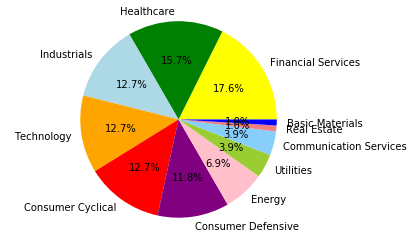

In [67]:
sector_list=['Financial Services','Healthcare','Industrials','Technology','Consumer Cyclical','Consumer Defensive','Energy','Utilities','Communication Services','Real Estate','Basic Materials']
sector_count=[18,16,13,13,13,12,7,4,4,1,1]
colors=["yellow","green","lightblue","orange","red","purple","pink","yellowgreen","lightskyblue","lightcoral","blue"]

plt.pie(sector_count,labels=sector_list,colors=colors,autopct="%1.1f%%")
plt.axis('equal')
plt.show()

In [68]:
stock_df['industry'].value_counts()

Drug Manufacturers                     7
Aerospace & Defense                    5
Banks                                  5
Credit Services                        5
Biotechnology                          4
Retail - Defensive                     4
Utilities - Regulated                  4
Industrial Products                    4
Consumer Packaged Goods                4
Entertainment                          4
Semiconductors                         4
Communication Services                 4
Application Software                   4
Online Media                           3
Retail - Apparel & Specialty           3
Transportation & Logistics             3
Autos                                  2
Brokers & Exchanges                    2
Oil & Gas - E&P                        2
Asset Management                       2
Oil & Gas - Integrated                 2
Oil & Gas - Services                   2
Medical Devices                        2
Insurance                              2
Tobacco Products

(150, 200)

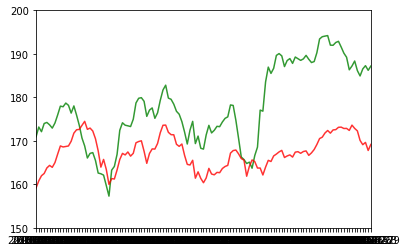

In [69]:
#APPLE HIGH YTD
apple_opens=updated_df.loc[updated_df.ticker=='AAPL']['high']
apple_days=updated_df.loc[updated_df.ticker=='AAPL']['date']
#print(apple_days.values)
apple_opens.max()
apple_opens.min()

plt.plot(apple_days,apple_opens,alpha=.8,color='green')
plt.xlim(np.min(apple_days),np.max(apple_days))
plt.ylim(150,200)


#TECH SECTOR HIGH YTD
sector_open=updated_df.groupby(pd.Grouper(key='date'))
sector_opens=sector_open['high'].mean()
sector_days=updated_df.loc[updated_df.ticker=='AAPL']['date']

plt.plot(sector_days,sector_opens,alpha=.8,color='red')
plt.xlim(np.min(sector_days),np.max(sector_days))
plt.ylim(150,200)


(150, 200)

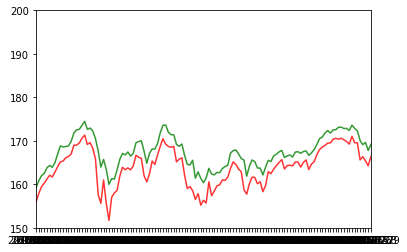

In [70]:

#AVERAGE OPEN OF TECH INDUSTRY AS A WHOLE ON EACH DAY

sector_open=updated_df.groupby(pd.Grouper(key='date'))
sector_opens=sector_open['high'].mean()
sector_days=updated_df.loc[updated_df.ticker=='AAPL']['date']

plt.plot(sector_days,sector_opens,alpha=.8,color='green')
plt.xlim(np.min(sector_days),np.max(sector_days))
plt.ylim(150,200)

sector_open=updated_df.groupby(pd.Grouper(key='date'))
sector_close=sector_open['low'].mean()
sector_days=updated_df.loc[updated_df.ticker=='AAPL']['date']
plt.plot(sector_days,sector_close,alpha=.8,color='red')
plt.xlim(np.min(sector_days),np.max(sector_days))
plt.ylim(150,200)

#print(sector_opens)


In [71]:
updated_df['sector']

Company
Apple Inc.                 Technology
Apple Inc.                 Technology
Apple Inc.                 Technology
Apple Inc.                 Technology
Apple Inc.                 Technology
Apple Inc.                 Technology
Apple Inc.                 Technology
Apple Inc.                 Technology
Apple Inc.                 Technology
Apple Inc.                 Technology
Apple Inc.                 Technology
Apple Inc.                 Technology
Apple Inc.                 Technology
Apple Inc.                 Technology
Apple Inc.                 Technology
Apple Inc.                 Technology
Apple Inc.                 Technology
Apple Inc.                 Technology
Apple Inc.                 Technology
Apple Inc.                 Technology
Apple Inc.                 Technology
Apple Inc.                 Technology
Apple Inc.                 Technology
Apple Inc.                 Technology
Apple Inc.                 Technology
Apple Inc.                 Technology
Appl

In [74]:

ticker=[]
opens=[]
days=[]

for tic in ticker:
    tic_open=updated_df.loc[updated_df.ticker==tic]['high']
    tic_days=updated_df.loc[updated_df.ticker==tic]['date']
    
    opens.append[tic_open]
    days.append[tic_days]
    
trace=Go.Scatter(
    x=days,
    y=opens,
    name="opens",line=dict(color = ('rgb(22, 96, 167)'),
        width = 4,))

NameError: name 'Go' is not defined